# Laporan Proyek Machine Learning - Ariestio Dava Pratama

Proyek ini bertujuan untuk menjawab beberapa Problem Statements, yaitu:
- Fitur atau komponen apa saja yang paling berpengaruh terhadap harga sebuah laptop?
- Bagaimana perusahaan dapat memprediksi harga laptop lebih akurat?

Untuk mencapai Goals, proyek ini akan:
- Menjelaskan fitur atau komponen utama yang paling berpengaruh terhadap harga laptop.
- Membangun model prediksi harga laptop yang akurat dengan berbagai teknik pembelajaran mesin.

#Data Loading

Sebelum memulai proyek, perlu untuk melakukan import library apa saja yang dibutuhkan.

In [2]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import files

Upload file Kaggle API yaitu kaggle.json untuk mengunduh dan mengekstrak dataset laptop-prices pada kaggle. Membuat directory dataset untuk menyimpan laptop-prices.csv

In [3]:
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!kaggle datasets download -d owm4096/laptop-prices
!mkdir dataset
!unzip laptop-prices.zip -d dataset
!ls dataset

Saving kaggle.json to kaggle.json
kaggle.json
Dataset URL: https://www.kaggle.com/datasets/owm4096/laptop-prices
License(s): other
Archive:  laptop-prices.zip
  inflating: dataset/laptop_prices.csv  
laptop_prices.csv


Menampilkan isi dari dataset laptop_prices.csv dengan `pd.read_csv()` dan disimpan pada variabel dataframe `df` yang hanya menampilkan 5 baris teratas `.head()`

In [4]:
df = pd.read_csv('dataset/laptop_prices.csv')
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


Karena fitur targetnya adalah Price_euros, pindahkan ke kolom paling kanan agar lebih mudah dibaca.

In [5]:
col_to_move = df.pop("Price_euros")
df.insert(22, "Price_euros", col_to_move)
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Screen,ScreenW,ScreenH,...,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,Standard,2560,1600,...,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,Standard,1440,900,...,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,898.94
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,Full HD,1920,1080,...,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,Standard,2880,1800,...,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,Standard,2560,1600,...,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,Full HD,1920,1080,...,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,Quad HD+,3200,1800,...,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,Standard,1366,768,...,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,Standard,1366,768,...,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330,764.00


Tabel diatas menunjukkan dataset terdapat 127 baris dan 23 kolom

# Exploratory Data Analysis

Berikut adalah tabel yang merangkum fitur-fitur dalam dataset:  

| Fitur                 | Deskripsi |
|----------------------|-----------|
| Company           | Produsen atau merek laptop. |
| Product           | Nama merek dan model laptop. |
| TypeName          | Jenis laptop (Notebook, Ultrabook, Gaming, dll.). |
| Inches           | Ukuran layar dalam inci. |
| Ram              | Kapasitas RAM dalam GB. |
| OS               | Sistem operasi yang terpasang pada laptop. |
| Weight           | Berat laptop dalam kilogram. |
| Screen           | Resolusi layar (Standard, Full HD, 4K Ultra HD, Quad HD+). |
| ScreenW          | Lebar layar dalam piksel. |
| ScreenH          | Tinggi layar dalam piksel. |
| Touchscreen      | Apakah laptop memiliki layar sentuh atau tidak. |
| IPSpanel         | Apakah layar laptop menggunakan panel IPS atau tidak. |
| RetinaDisplay    | Apakah layar laptop memiliki Retina Display atau tidak. |
| CPU_company      | Produsen prosesor laptop. |
| CPU_freq         | Kecepatan prosesor laptop dalam Hz. |
| CPU_model        | Model prosesor yang digunakan. |
| PrimaryStorage   | Kapasitas penyimpanan utama dalam GB. |
| PrimaryStorageType | Jenis penyimpanan utama (HDD, SSD, Flash Storage, Hybrid). |
| SecondaryStorage | Kapasitas penyimpanan tambahan jika tersedia (GB). |
| SecondaryStorageType | Jenis penyimpanan tambahan (HDD, SSD, Hybrid, atau Tidak Ada). |
| GPU_company      | Produsen kartu grafis. |
| GPU_model        | Model kartu grafis yang digunakan. |
| Price_euros      | Harga laptop dalam Euro (target prediksi). |

## Eksplorasi Data

Menampilkan informasi dataset berupa adanya missing value dan tipe datanya

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Screen                1275 non-null   object 
 8   ScreenW               1275 non-null   int64  
 9   ScreenH               1275 non-null   int64  
 10  Touchscreen           1275 non-null   object 
 11  IPSpanel              1275 non-null   object 
 12  RetinaDisplay         1275 non-null   object 
 13  CPU_company           1275 non-null   object 
 14  CPU_freq              1275 non-null   float64
 15  CPU_model            

Dataset ini berisi 1.275 baris dan 23 kolom, dengan berbagai tipe data seperti numerik (float64, int64) dan kategori (object). Semua kolom terisi lengkap tanpa ada data yang hilang.

Melihat deskripsi Dataset dengan deskripsi numerik

In [7]:
df.describe()

,Inches,Ram,Weight,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Price_euros
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1900.043922,1073.904314,2.302980,444.517647,176.069020,1134.969059
std,1.429470,5.097809,0.669196,493.346186,283.883940,0.503846,365.537726,415.960655,700.752504
min,10.100000,2.000000,0.690000,1366.000000,768.000000,0.900000,8.000000,0.000000,174.000000
25%,14.000000,4.000000,1.500000,1920.000000,1080.000000,2.000000,256.000000,0.000000,609.000000
50%,15.600000,8.000000,2.040000,1920.000000,1080.000000,2.500000,256.000000,0.000000,989.000000
75%,15.600000,8.000000,2.310000,1920.000000,1080.000000,2.700000,512.000000,0.000000,1496.500000
max,18.400000,64.000000,4.700000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000,6099.000000


Dataset ini memiliki 1.275 entri, dan setiap kolom numerik dianalisis berdasarkan nilai rata-rata (mean), standar deviasi (std), nilai minimum (min), serta kuartil (25%, 50%, 75%) dan maksimum (max). Dari statistik ini, terlihat adanya variasi yang cukup besar dalam fitur-fitur seperti harga, RAM, berat, dan resolusi layar, menunjukkan keberagaman spesifikasi laptop dalam dataset.

Menampilkan ada tidaknya missing value setiap fitur dataset

In [8]:
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Screen,0
ScreenW,0
ScreenH,0


Dataset ini tidak memiliki data yang hilang, karena setiap kolom memiliki jumlah entri yang lengkap tanpa nilai null

Menampilkan jumlah duplikat dari dataset

In [9]:
df.duplicated().sum()

np.int64(0)

Dataset ini tidak memiliki data duplikat, karena hasil pemeriksaan menunjukkan 0 duplikasi.

Melihat jumlah kategori unik dalam setiap fitur

In [10]:
df.nunique()

,0
Company,19
Product,618
TypeName,6
Inches,18
Ram,9
OS,9
Weight,171
Screen,4
ScreenW,13
ScreenH,10


Dataset ini memiliki variasi unik pada setiap fitur, seperti 19 merek laptop (Company), 618 model berbeda (Product), dan 791 variasi harga (Price_euros). Beberapa fitur bersifat biner, seperti Touchscreen, IPSpanel, dan RetinaDisplay, yang hanya memiliki 2 nilai unik, sedangkan fitur lainnya, seperti CPU_freq (25 nilai unik) dan GPU_model (110 nilai unik), menunjukkan keberagaman spesifikasi yang lebih besar.

## Univariate Analysis (Satu Variabel)

Tahap Univariate Analysis bertujuan untuk memahami distribusi masing-masing fitur dalam dataset, baik numerik maupun kategori. Analisis ini membantu mengidentifikasi pola, nilai ekstrem, serta kemungkinan data yang tidak seimbang.

### Fitur-fitur Kategori

#### Fitur kategori dengan lebih dari 10 nilai unik

Fitur kategori dengan lebih dari 10 nilai unik akan divisualisasikan hanya untuk 10 kategori teratas berdasarkan frekuensi kemunculannya

<ipython-input-11-9e1eb6569df0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")


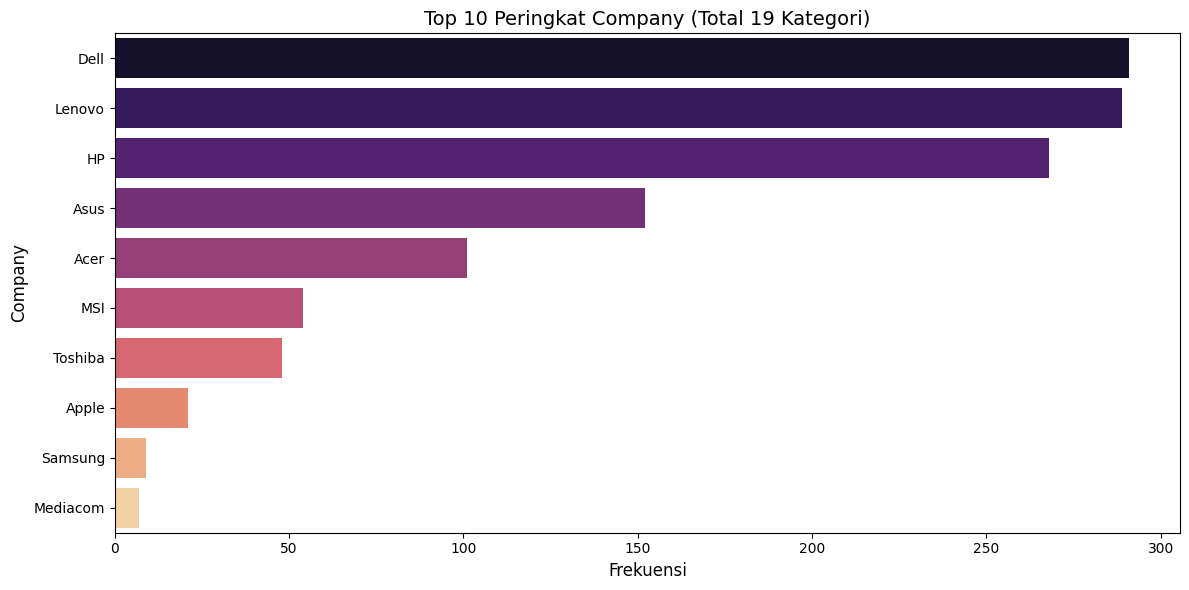

<ipython-input-11-9e1eb6569df0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")


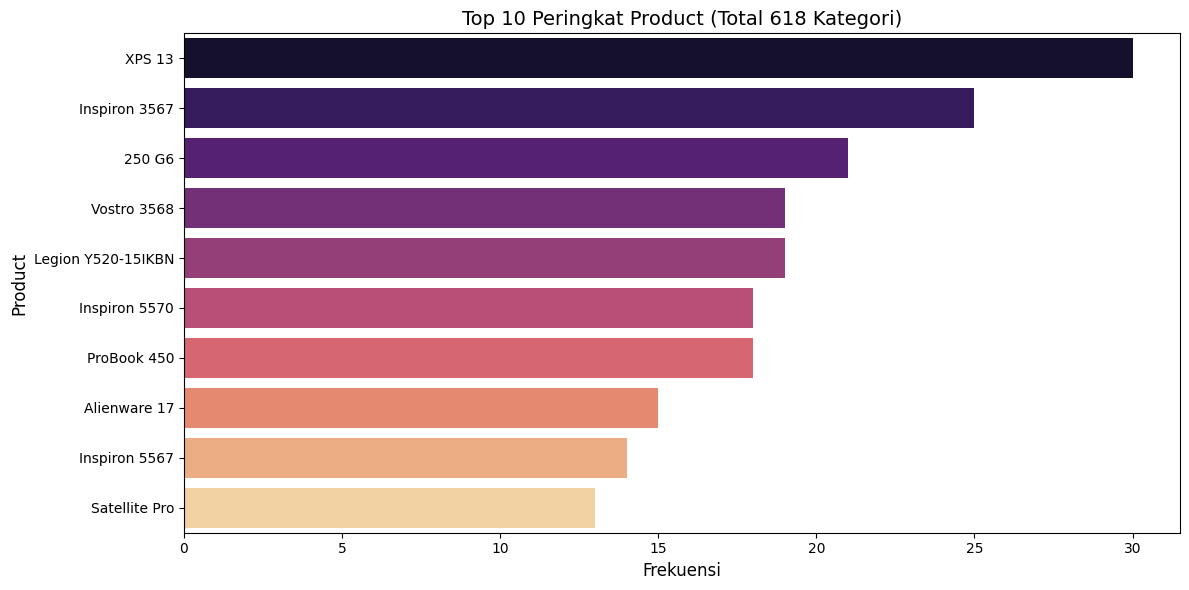

<ipython-input-11-9e1eb6569df0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")


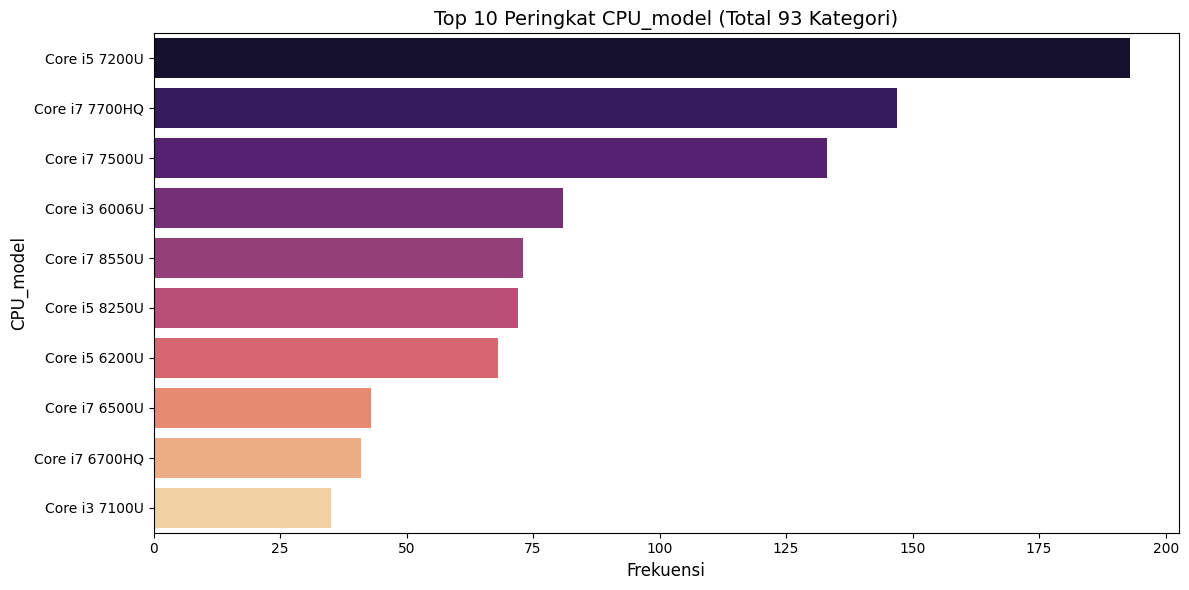

<ipython-input-11-9e1eb6569df0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")


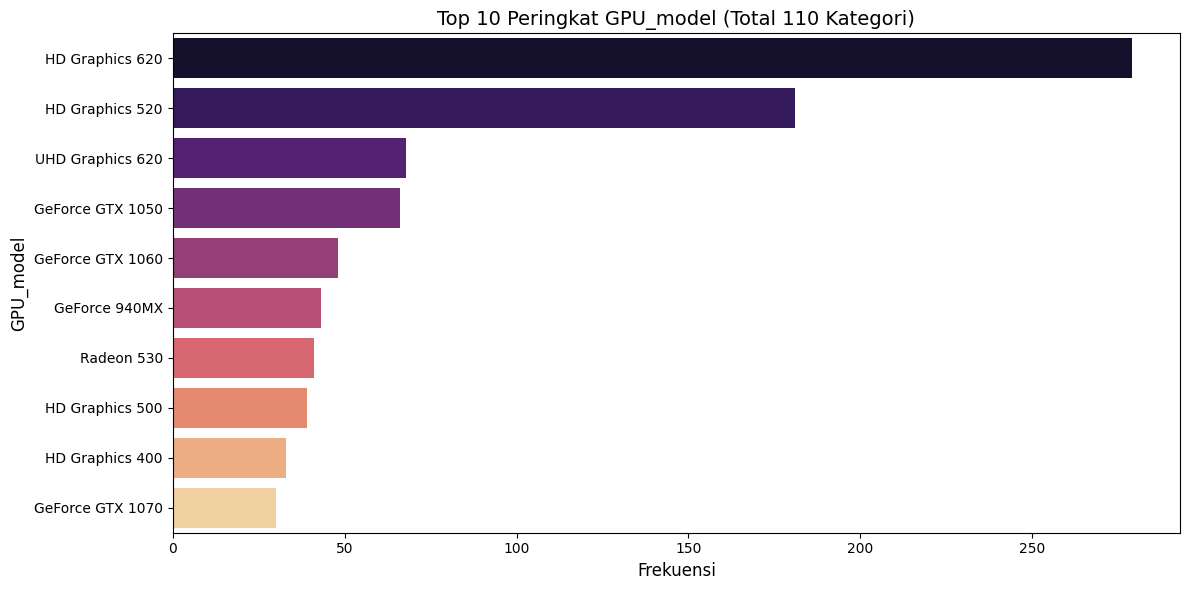

In [11]:
N = 10  # Jumlah kategori teratas yang muncul
top_10_cat_col = ["Company", "Product", "CPU_model", "GPU_model"]

for col in top_10_cat_col:
    plt.figure(figsize=(12, 6))
    value_counts = df[col].value_counts()
    top_categories = value_counts.nlargest(min(N, len(value_counts)))

    sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")

    title_text = f'Top 10 Peringkat {col} (Total {len(value_counts)} Kategori)'
    plt.title(title_text, fontsize=14)
    plt.xlabel('Frekuensi', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()

Berdasarkan plot dari masing-masing fitur kategori diatas bahwa:

1. **Company** – Sebagian besar laptop dalam dataset berasal dari Dell dan Lenovo, sementara merek seperti Samsung dan Mediacom jauh lebih sedikit. Ini menunjukkan dominasi merek-merek besar di pasaran.  

2. **Product** – Model laptop seperti XPS 13 dan Inspiron 3567 lebih banyak ditemukan dibandingkan model lainnya. Hal ini mengindikasikan bahwa beberapa model tertentu lebih populer atau memiliki lebih banyak variasi.  

3. **CPU Model** – Prosesor Intel, terutama Core i5 7200U dan Core i7 7700HQ, mendominasi penggunaan dibandingkan model lainnya. Ini menunjukkan bahwa laptop dalam dataset lebih banyak menggunakan prosesor Intel dibanding merek lain.  

4. **GPU Model** – Sebagian besar laptop menggunakan GPU terintegrasi seperti HD Graphics 620 dan 520, sedangkan GPU khusus seperti GTX 1050 dan GTX 1060 lebih jarang ditemukan. Ini menandakan bahwa mayoritas laptop dalam dataset dirancang untuk penggunaan sehari-hari, bukan untuk keperluan grafis tinggi.

#### Fitur-fitur kategori yang hasilnya unik kurang dari 10.

<ipython-input-12-f70ca61b6f5c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")


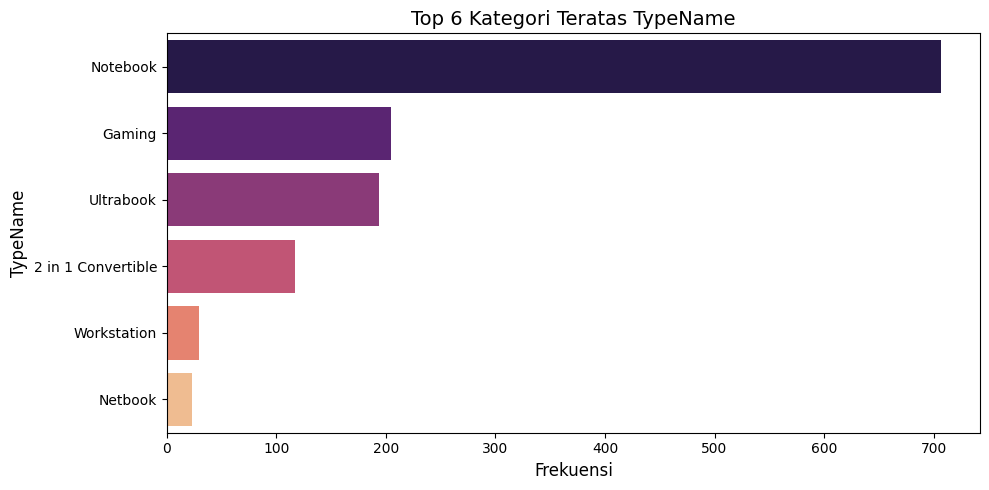

<ipython-input-12-f70ca61b6f5c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")


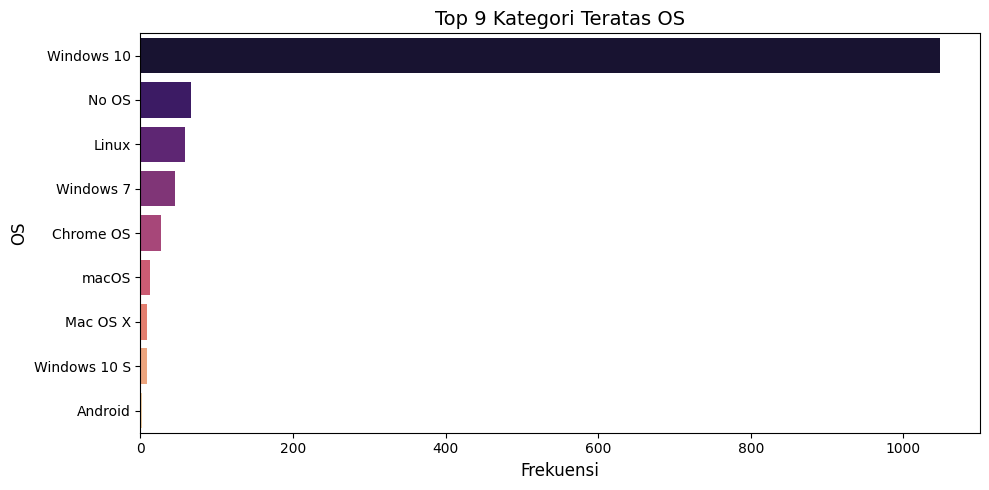

<ipython-input-12-f70ca61b6f5c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")


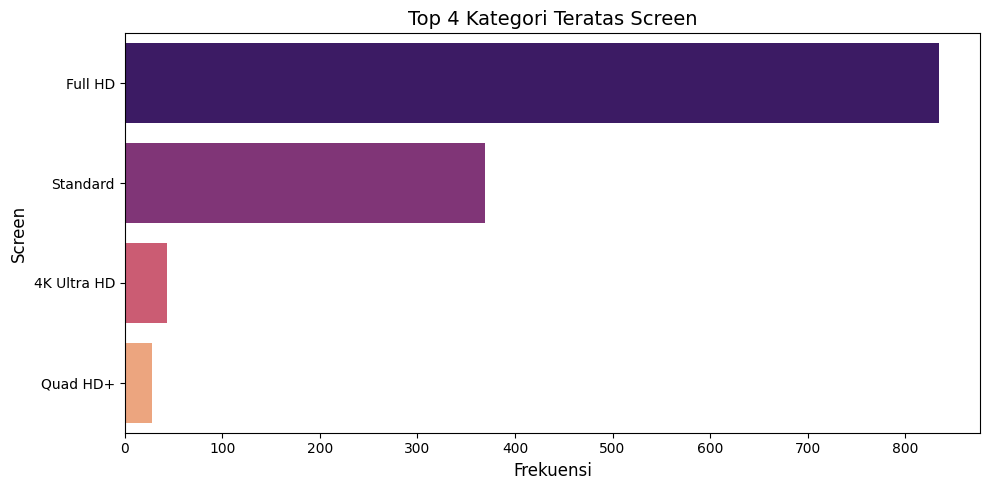

<ipython-input-12-f70ca61b6f5c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")


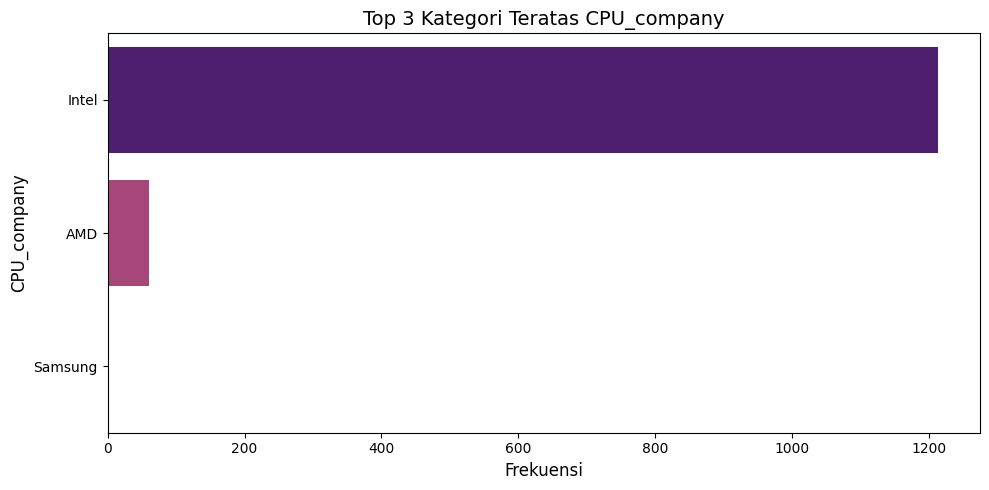

<ipython-input-12-f70ca61b6f5c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")


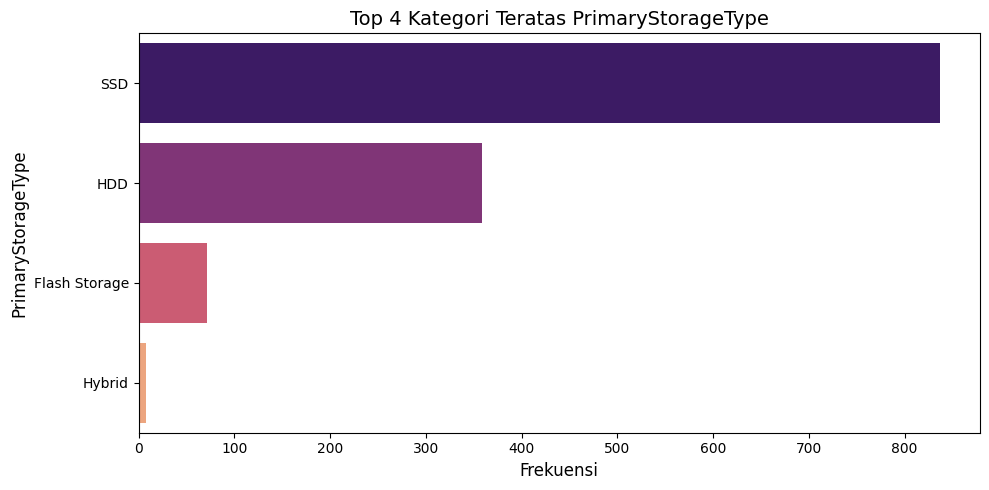

<ipython-input-12-f70ca61b6f5c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")


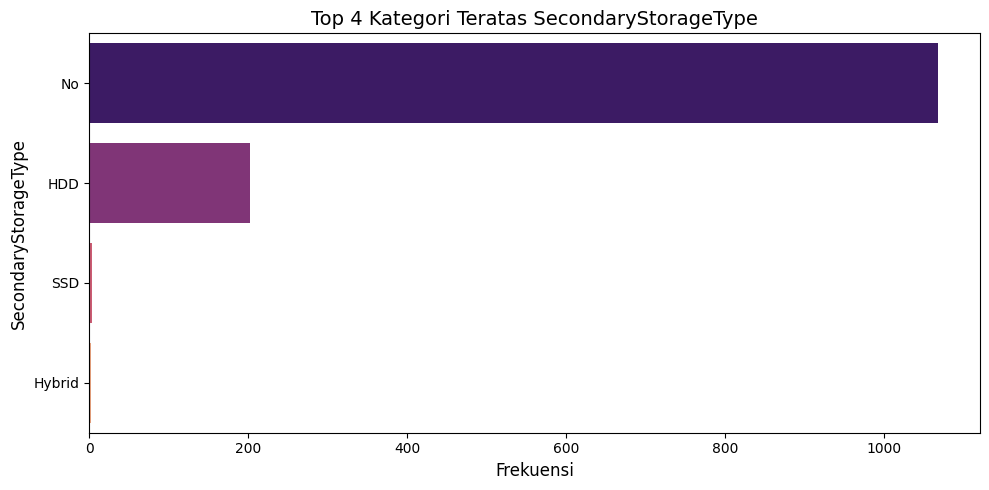

<ipython-input-12-f70ca61b6f5c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")


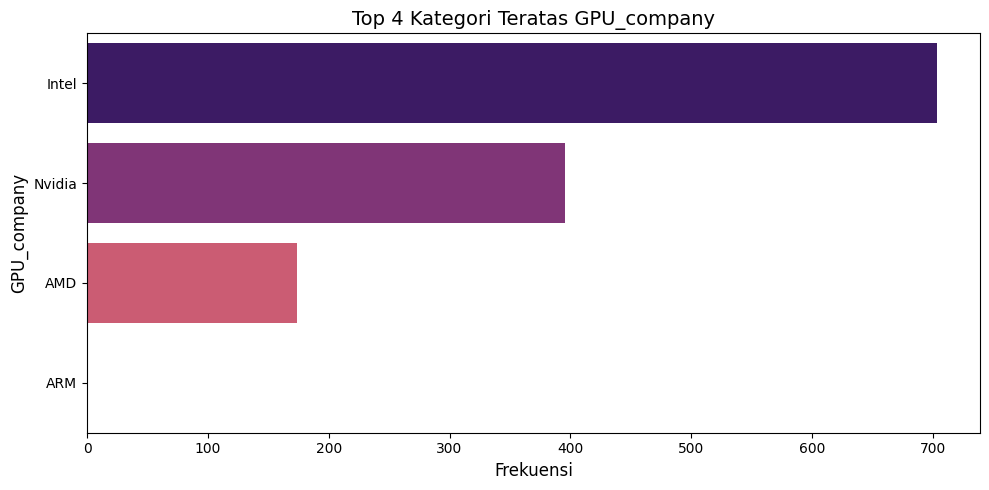

In [12]:
cat_col = ["TypeName", "OS", "Screen", "CPU_company", "PrimaryStorageType", "SecondaryStorageType", "GPU_company"]

for col in cat_col:
    plt.figure(figsize=(10, 5))
    value_counts = df[col].value_counts()
    top_categories = value_counts.nlargest(min([len(value_counts)]))

    sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")

    title_text = f'Top {len(value_counts)} Kategori Teratas {col}'
    plt.title(title_text, fontsize=14)
    plt.xlabel('Frekuensi', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()

Berdasarkan plot untuk fitur kategori dengan jumlah unik kurang dari 10, berikut analisisnya:  

1. **TypeName** – Mayoritas laptop merupakan notebook dengan jumlah terbanyak, menunjukkan bahwa laptop serbaguna lebih banyak tersedia dibandingkan gaming atau ultrabook yang lebih spesifik untuk performa atau portabilitas.

2. **OS** – Windows 10 mendominasi sebagai sistem operasi utama, menunjukkan bahwa sistem ini masih menjadi standar industri, sementara Android hampir tidak digunakan untuk laptop.  

3. **Screen** – Sebagian besar laptop menggunakan resolusi Full HD, menandakan bahwa resolusi ini menjadi pilihan utama, sementara Quad HD+ masih jarang ditemukan, kemungkinan karena harga yang lebih tinggi.  

4. **CPU_company** – Intel mendominasi sebagai produsen prosesor utama, menunjukkan bahwa merek ini masih menjadi pilihan utama, sedangkan Samsung sangat jarang digunakan dalam laptop.  

5. **PrimaryStorageType** – SSD lebih umum dibanding HDD, menunjukkan bahwa SSD semakin menjadi standar karena kecepatan yang lebih tinggi, sementara Hybrid hampir tidak digunakan.  

6. **SecondaryStorageType** – Sebagian besar laptop tidak memiliki penyimpanan sekunder, yang menunjukkan bahwa banyak produsen lebih memilih penyimpanan tunggal dengan kapasitas besar daripada kombinasi dua penyimpanan.  

7. **GPU_company** – Intel mendominasi sebagai penyedia GPU, menunjukkan bahwa kebanyakan laptop masih mengandalkan GPU terintegrasi, sementara ARM hampir tidak digunakan.

#### Fitur kategori yang hanya memiliki 2 kategori (Yes/No)

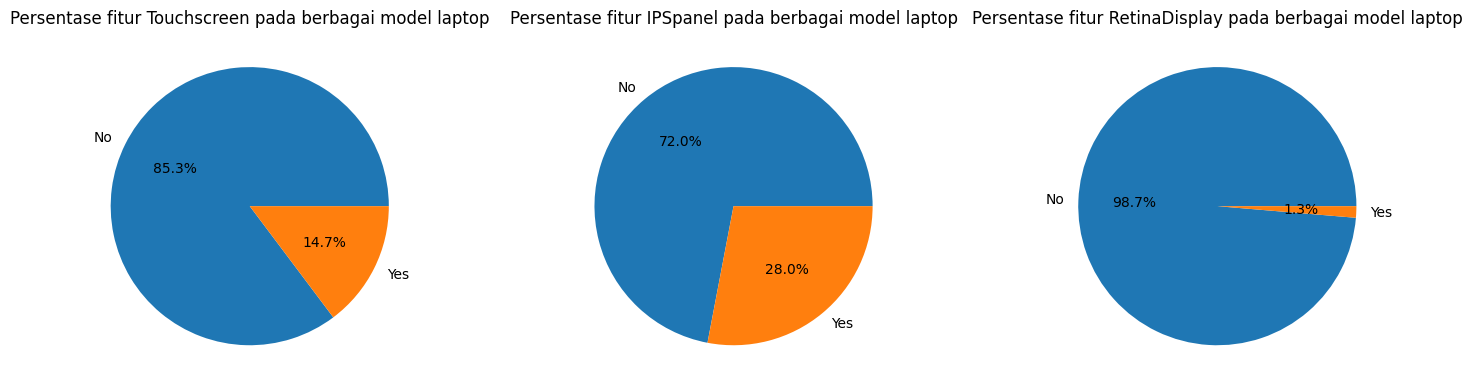

In [13]:
binary_cat_col = ["Touchscreen", "IPSpanel", "RetinaDisplay"]

fig, axes = plt.subplots(1, len(binary_cat_col), figsize=(len(binary_cat_col) * 5, 4))

for ax, col in zip(axes, binary_cat_col):
    counts = df[col].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
    ax.set_title(f"Persentase fitur {col} pada berbagai model laptop")

plt.tight_layout()
plt.show()

Berikut analisis untuk fitur kategori biner berdasarkan plot diatas:  

- **Touchscreen** – Sebagian besar laptop tidak memiliki layar sentuh, menunjukkan bahwa fitur ini masih bukan standar umum dan lebih banyak ditemukan pada model tertentu seperti 2-in-1 convertible.  
- **IPSpanel** – Panel IPS tidak selalu digunakan pada semua laptop, menandakan bahwa banyak model masih menggunakan panel TN atau teknologi lainnya, kemungkinan untuk menekan biaya produksi.  
- **RetinaDisplay** – Hanya sebagian kecil laptop yang memiliki Retina Display, menunjukkan bahwa fitur ini lebih eksklusif dan biasanya ditemukan pada produk-produk premium seperti MacBook.

### Fitur-fitur Numerik

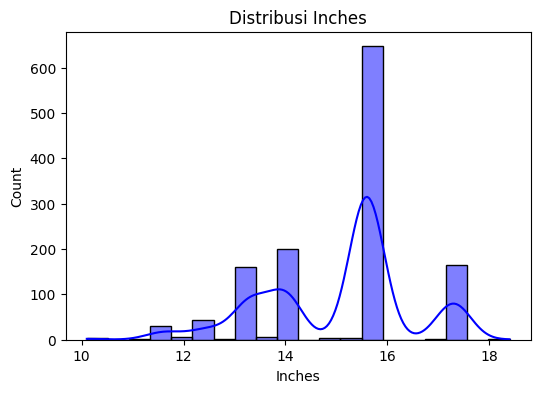

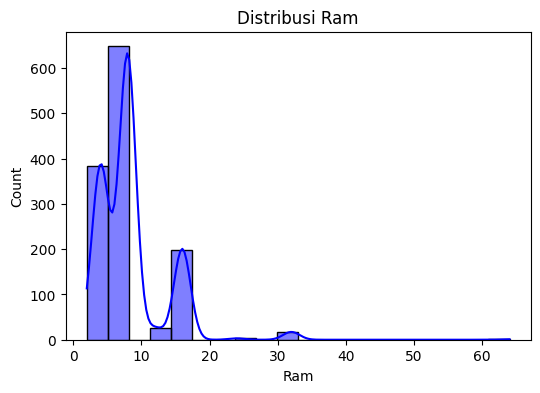

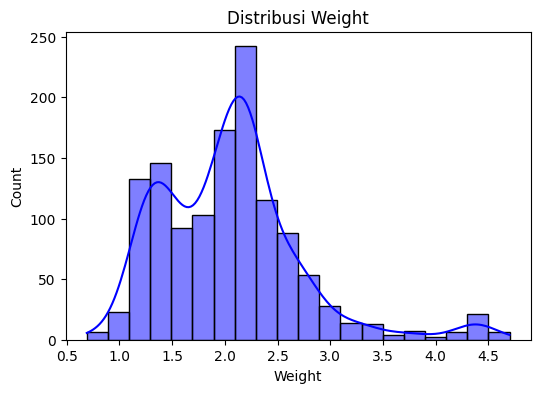

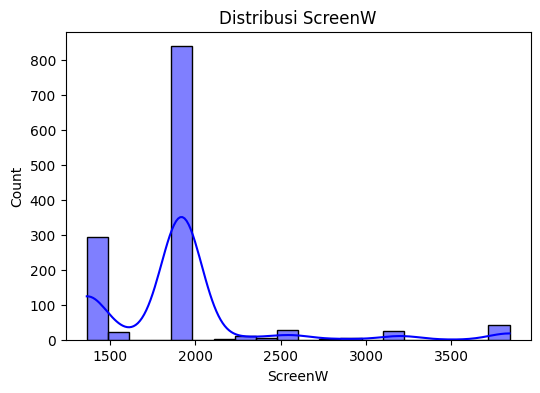

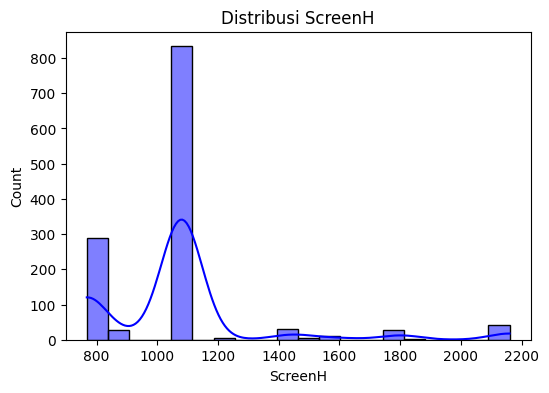

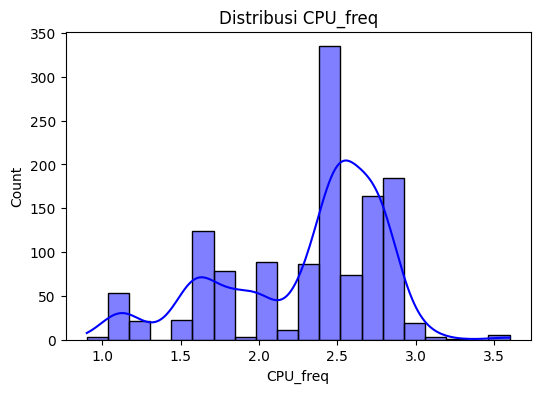

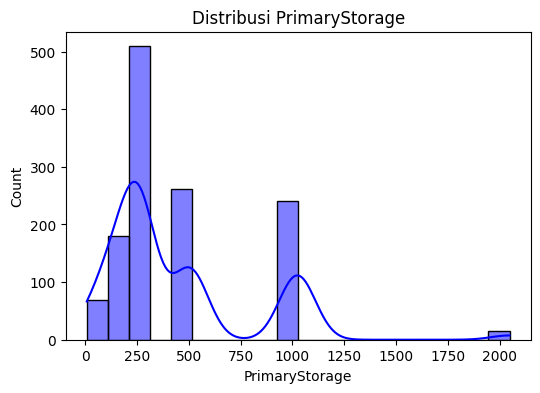

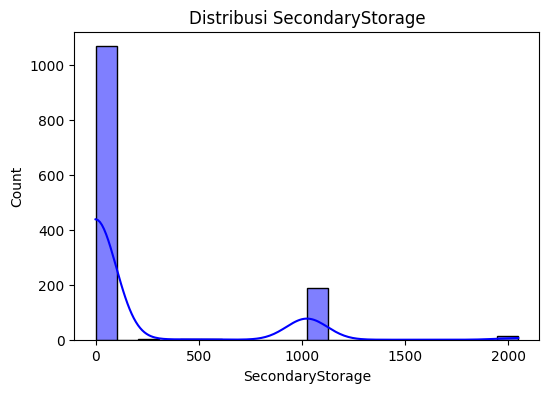

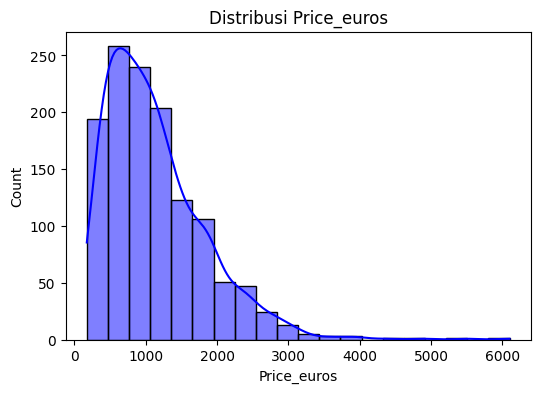

In [14]:
num_features = df.select_dtypes(include=np.number).columns.tolist()

for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=20, kde=True, color='blue')
    plt.title(f'Distribusi {col}')
    plt.show()

Berdasarkan plot histogram diatas dengan fitur numerik yang menunjukkan:

- Inches – Sebagian besar laptop memiliki ukuran layar antara 14 hingga 15.6 inci, menunjukkan bahwa ukuran ini adalah standar yang paling umum digunakan.

- Ram – Mayoritas laptop memiliki RAM 8GB, menunjukkan keseimbangan antara performa dan harga, sementara RAM 16GB atau lebih umum pada laptop kelas atas.

- Weight – Sebagian besar laptop memiliki bobot sekitar 2 kg, menandakan keseimbangan antara portabilitas dan daya tahan baterai.

- ScreenW & ScreenH – Resolusi layar paling umum adalah 1920x1080, menunjukkan bahwa Full HD masih menjadi standar utama untuk berbagai jenis laptop.

- CPU_freq – Kecepatan prosesor berkisar antara 2 hingga 3 GHz pada kebanyakan laptop, menunjukkan bahwa rentang ini cukup untuk kebutuhan komputasi umum.

- PrimaryStorage & SecondaryStorage – Sebagian besar laptop memiliki penyimpanan utama sekitar 256GB hingga 512GB, sedangkan penyimpanan sekunder umumnya tidak ada atau berkapasitas lebih kecil.

- Price_euros – Harga laptop bervariasi dengan mayoritas berkisar antara 600 hingga 1500 euro, menunjukkan bahwa segmen menengah lebih mendominasi pasar.

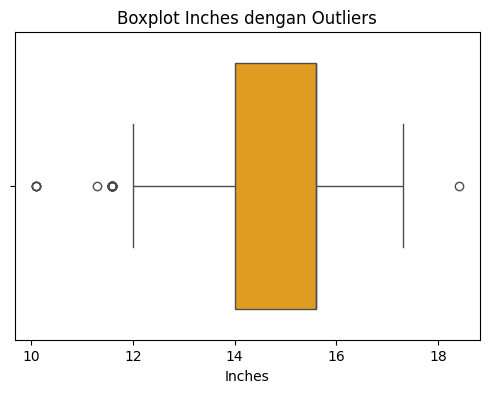

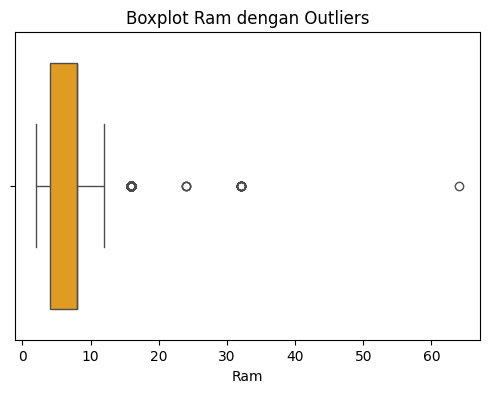

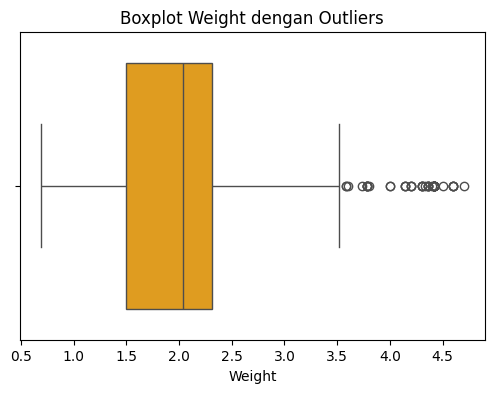

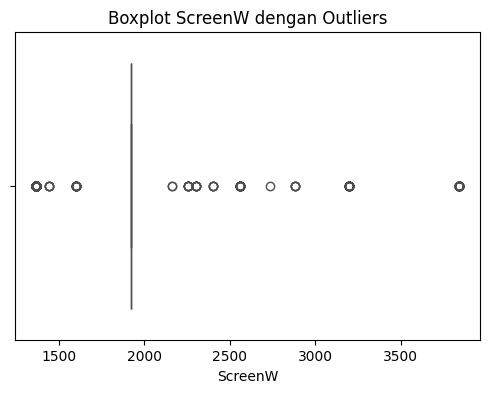

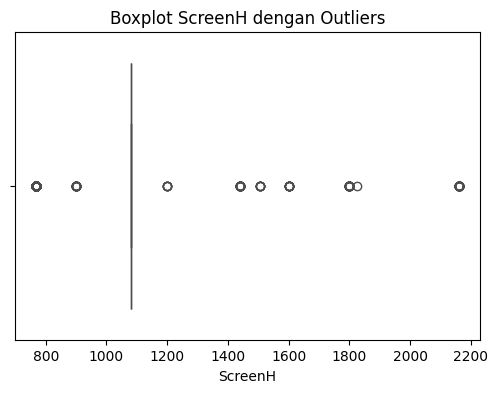

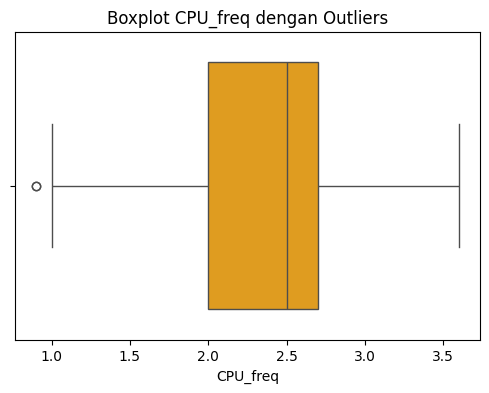

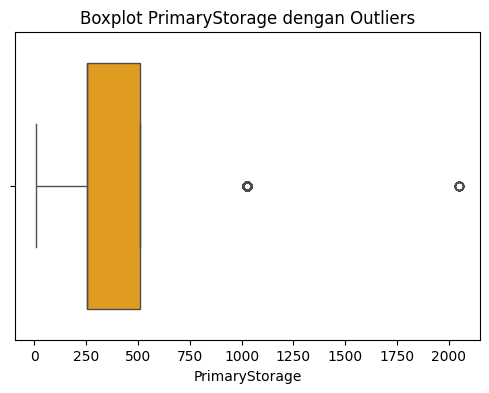

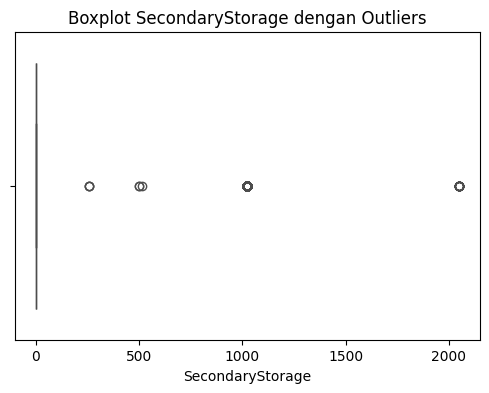

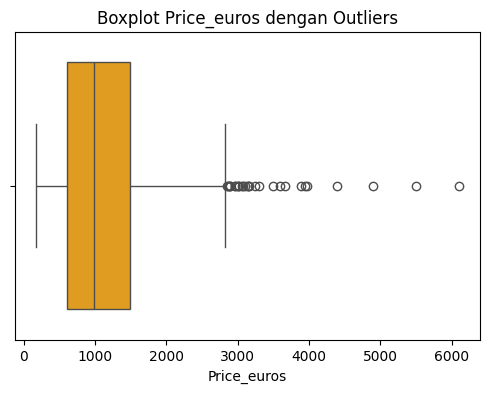

In [15]:
for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot {col} dengan Outliers')
    plt.show()

Berdasarkan boxplot, setiap fitur numerik memiliki outlier, yang menunjukkan adanya nilai ekstrem di dalam data:  

- **Inches, ScreenW, dan ScreenH** – Beberapa laptop memiliki ukuran layar yang jauh lebih kecil atau besar dibanding mayoritas, baik dalam hal diagonal (inches) maupun resolusi layar (ScreenW dan ScreenH).  

- **Weight** – Terdapat laptop dengan bobot yang sangat ringan atau berat, menunjukkan perbedaan desain antara ultrabook dan workstation.  

- **Ram** – Laptop dengan RAM 32GB atau lebih menjadi outlier, biasanya ditemukan pada perangkat kelas atas atau gaming.  

- **CPU_freq** – Beberapa prosesor memiliki kecepatan sangat tinggi, yang sering kali berasal dari seri flagship atau workstation.  

- **PrimaryStorage & SecondaryStorage** – Kapasitas penyimpanan di atas 1TB menjadi outlier, menunjukkan bahwa hanya sebagian kecil laptop yang dilengkapi dengan storage besar.  

- **Price_euros** – Harga laptop memiliki outlier di rentang yang sangat tinggi, menandakan adanya laptop premium atau workstation dengan harga jauh di atas rata-rata.

Karena adanya outlier, ini bisa diatasi dengan metode IQR, yaitu menghapus nilai yang terlalu jauh dari rentang normal agar data tetap akurat.

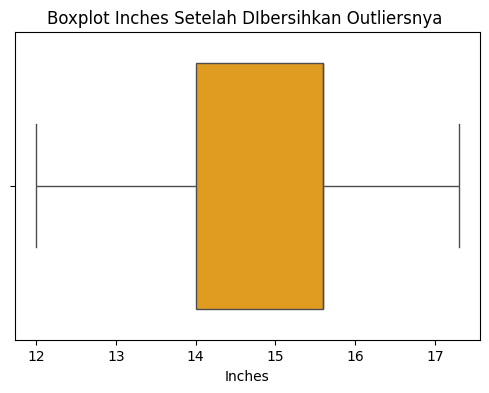

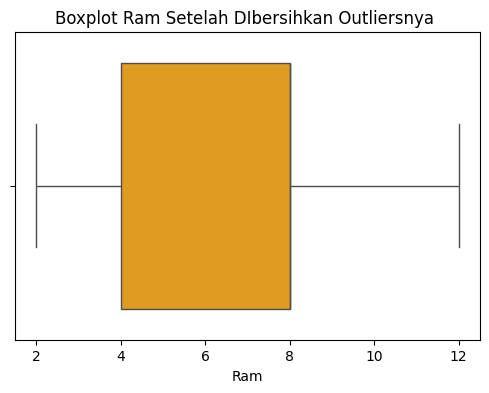

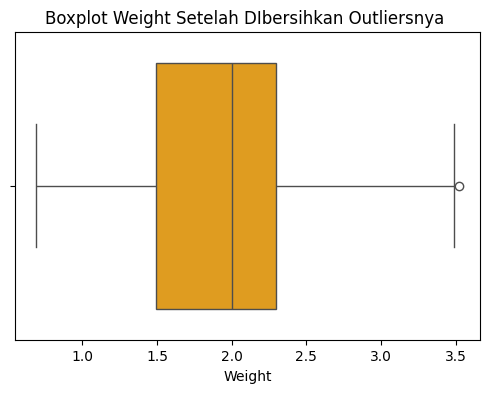

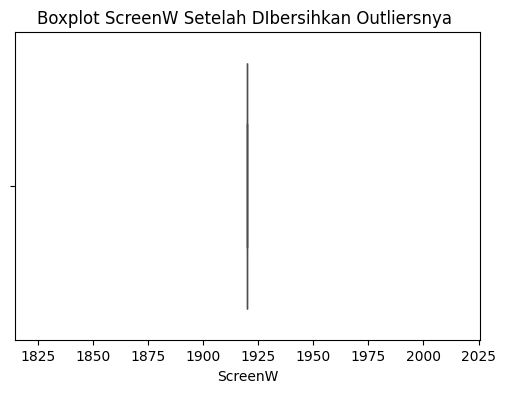

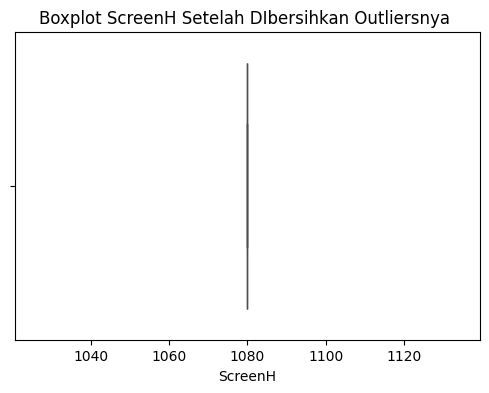

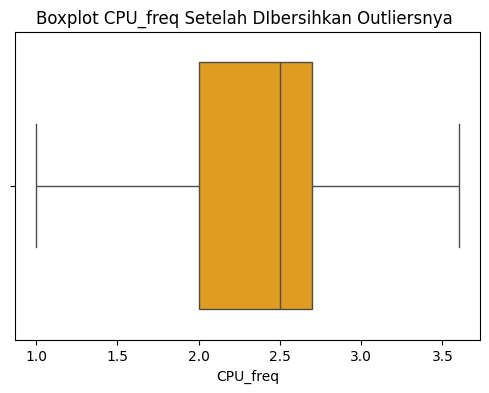

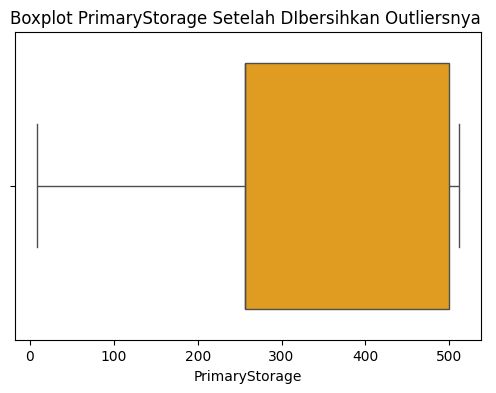

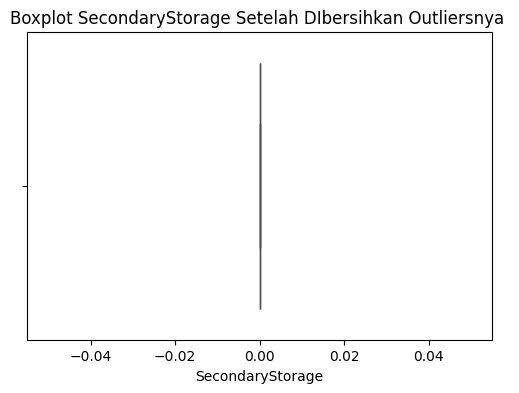

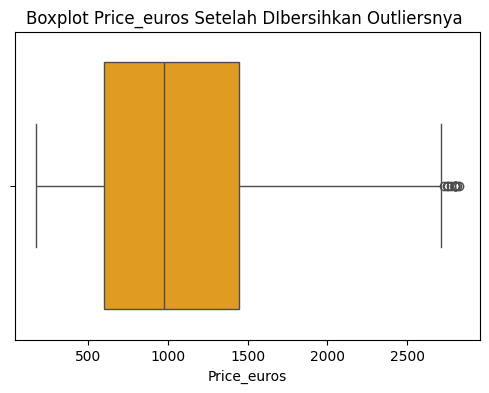

In [16]:
Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df[num_features] >= lower_bound) & (df[num_features] <= upper_bound)]

for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_cleaned[col], color='orange')
    plt.title(f'Boxplot {col} Setelah DIbersihkan Outliersnya ')
    plt.show()

## Multivariate Analysis (Lebih dari dua variabel)

Multivariate Analysis bertujuan memahami hubungan antar variabel, khususnya faktor yang memengaruhi price_euros, untuk mengidentifikasi pola dan korelasi dalam data.

### Fitur-fitur Kategori

#### Fitur kategori dengan lebih dari 10 nilai unik

<ipython-input-17-42b328b50eaa>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Price_euros", data=filtered_df, estimator=np.mean, palette="viridis")


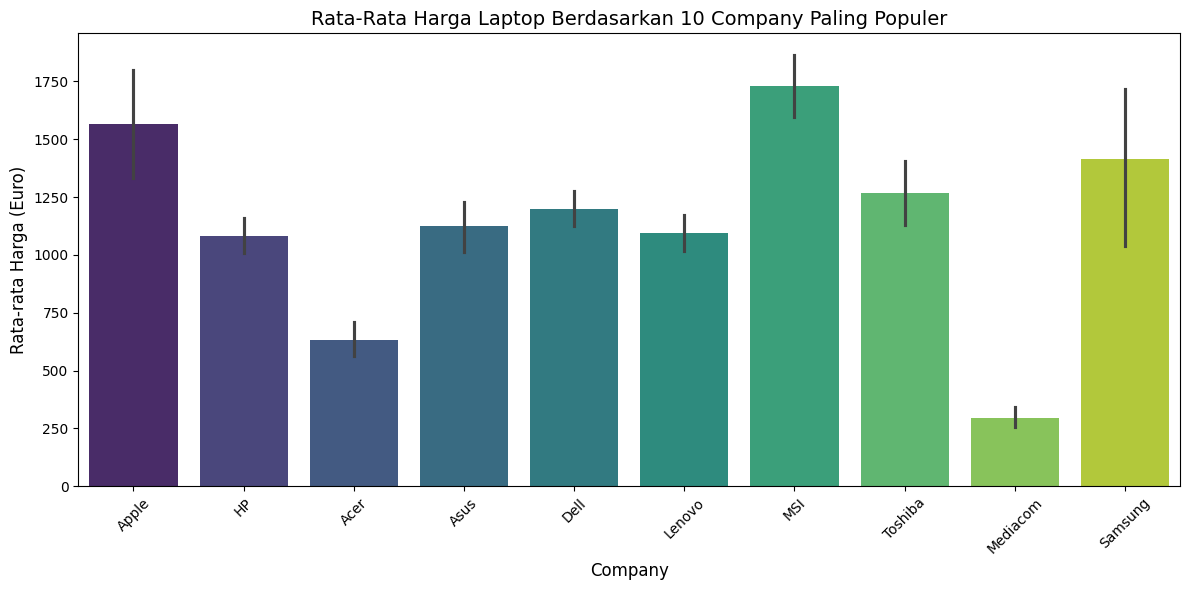

<ipython-input-17-42b328b50eaa>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Price_euros", data=filtered_df, estimator=np.mean, palette="viridis")


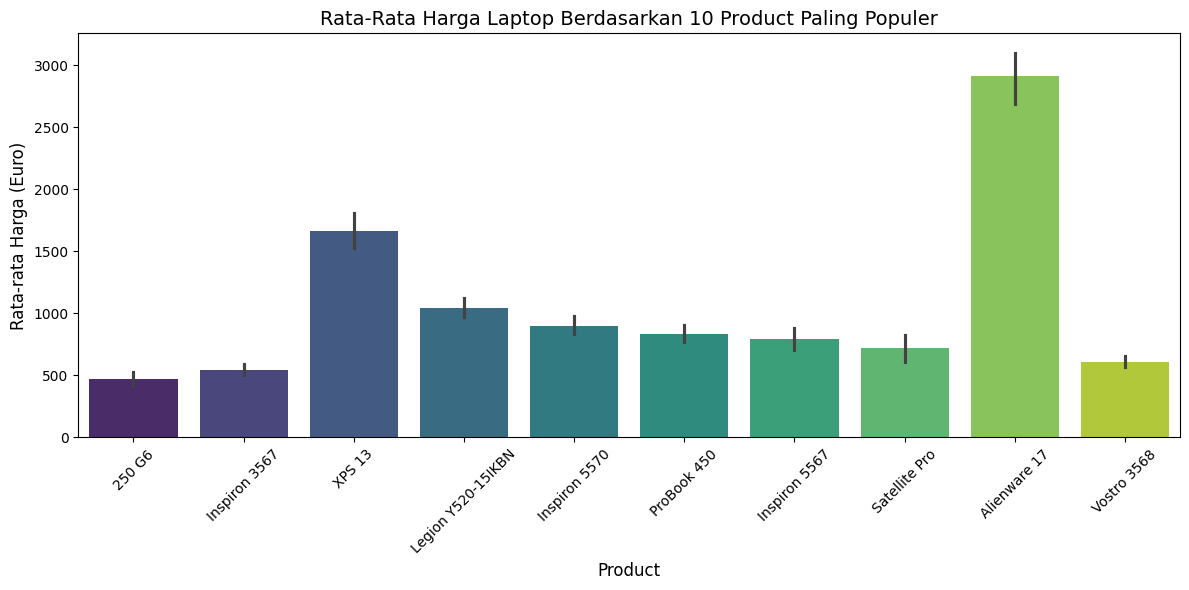

<ipython-input-17-42b328b50eaa>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Price_euros", data=filtered_df, estimator=np.mean, palette="viridis")


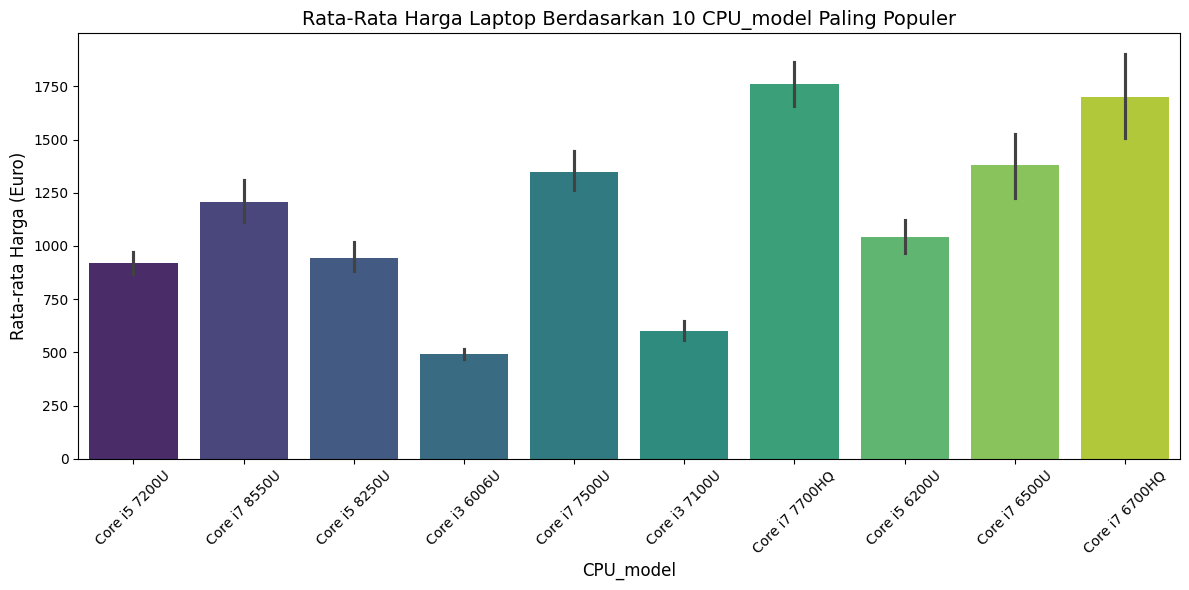

<ipython-input-17-42b328b50eaa>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Price_euros", data=filtered_df, estimator=np.mean, palette="viridis")


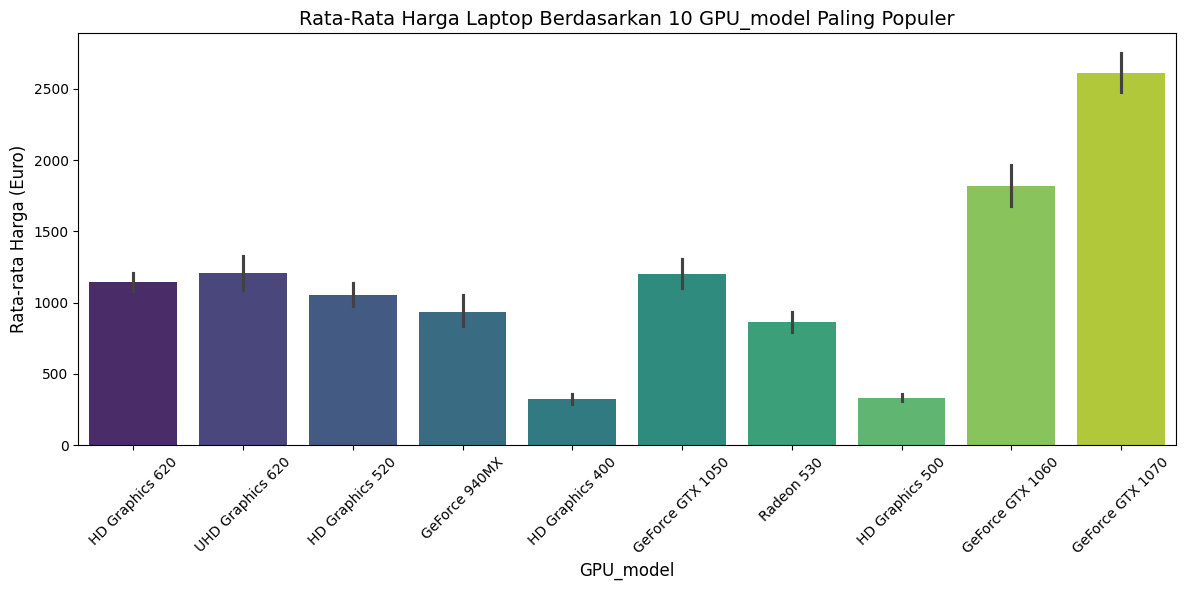

In [17]:
N = 10  # Jumlah kategori teratas yang muncul
top_10_cat_col = ["Company", "Product", "CPU_model", "GPU_model"]

for col in top_10_cat_col:
    plt.figure(figsize=(12, 6))
    value_counts = df[col].value_counts()
    top_categories = value_counts.nlargest(min(N, len(value_counts)))

    filtered_df = df[df[col].isin(top_categories.index)]

    sns.barplot(x=col, y="Price_euros", data=filtered_df, estimator=np.mean, palette="viridis")

    plt.title(f"Rata-Rata Harga Laptop Berdasarkan 10 {col} Paling Populer", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Rata-rata Harga (Euro)", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Grafik diatas menunjukkan rata-rata harga laptop bahwa brand, model, spesifikasi CPU, dan GPU menjadi faktor utama yang memengaruhi harga.

Laptop dari brand premium dan gaming cenderung lebih mahal, sementara model yang ditujukan untuk penggunaan sehari-hari lebih terjangkau.
Prosesor dan GPU berperforma tinggi juga berkontribusi pada harga yang lebih tinggi, sedangkan laptop dengan spesifikasi dasar memiliki harga lebih rendah.

#### Fitur-fitur kategori yang hasilnya unik kurang dari 10.

<ipython-input-18-8ad657a12bfd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Price_euros", data=df, estimator=np.mean, palette="viridis")


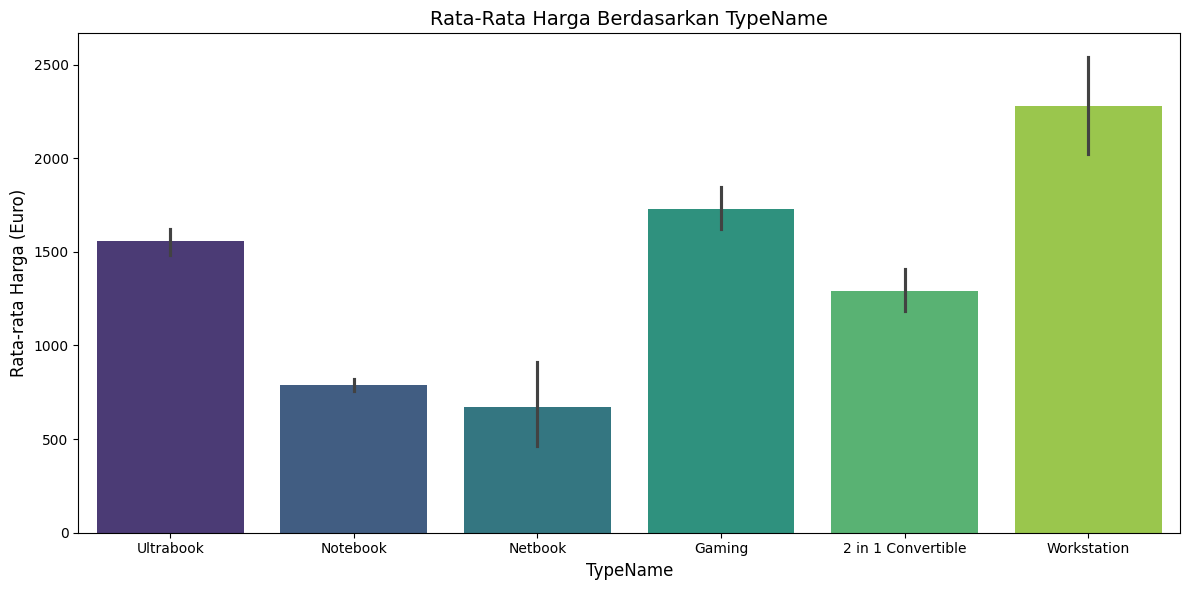

<ipython-input-18-8ad657a12bfd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Price_euros", data=df, estimator=np.mean, palette="viridis")


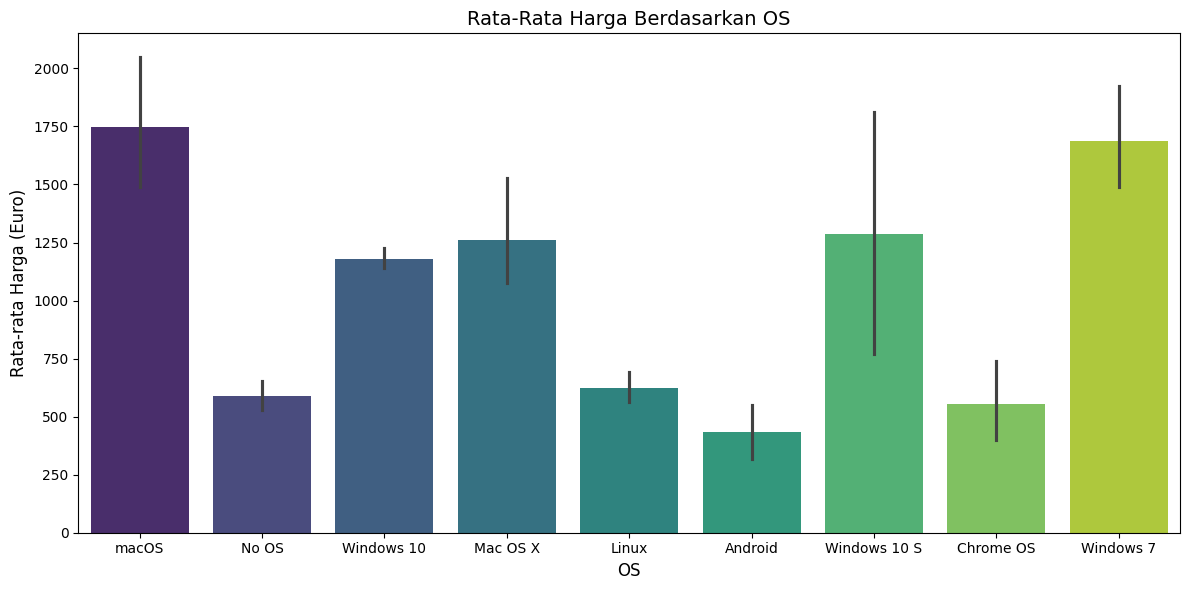

<ipython-input-18-8ad657a12bfd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Price_euros", data=df, estimator=np.mean, palette="viridis")


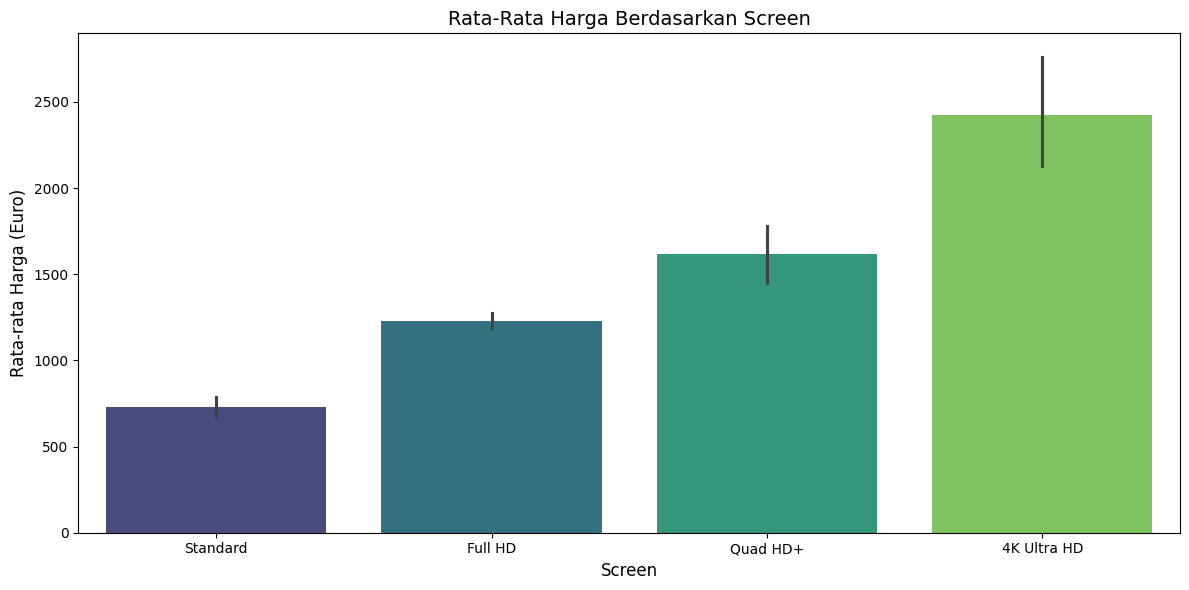

<ipython-input-18-8ad657a12bfd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Price_euros", data=df, estimator=np.mean, palette="viridis")


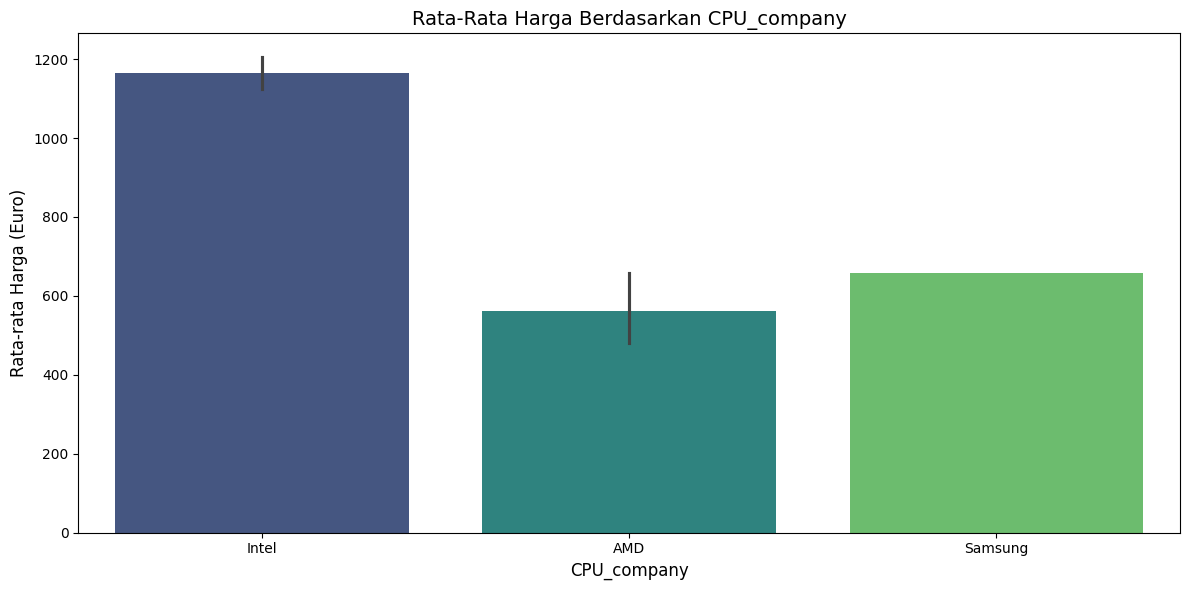

<ipython-input-18-8ad657a12bfd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Price_euros", data=df, estimator=np.mean, palette="viridis")


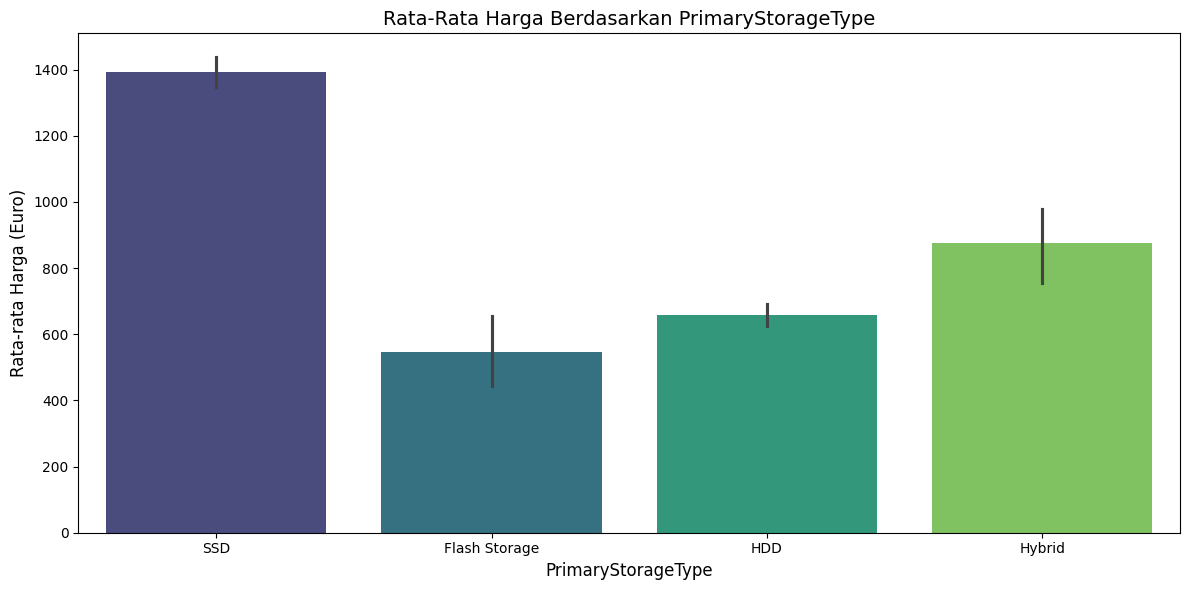

<ipython-input-18-8ad657a12bfd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Price_euros", data=df, estimator=np.mean, palette="viridis")


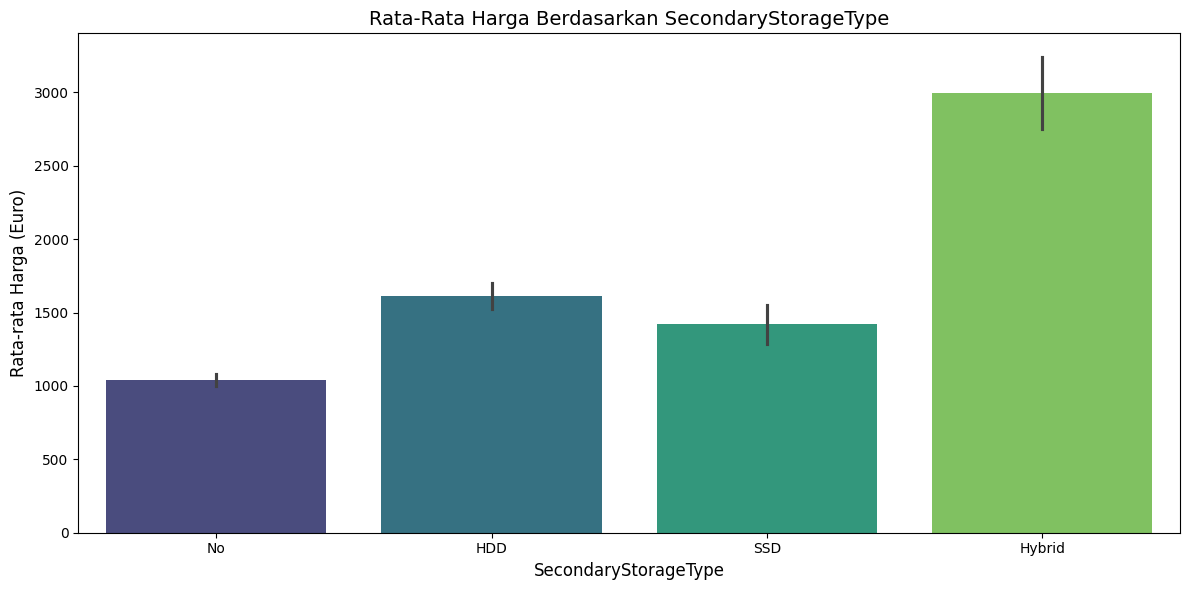

<ipython-input-18-8ad657a12bfd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Price_euros", data=df, estimator=np.mean, palette="viridis")


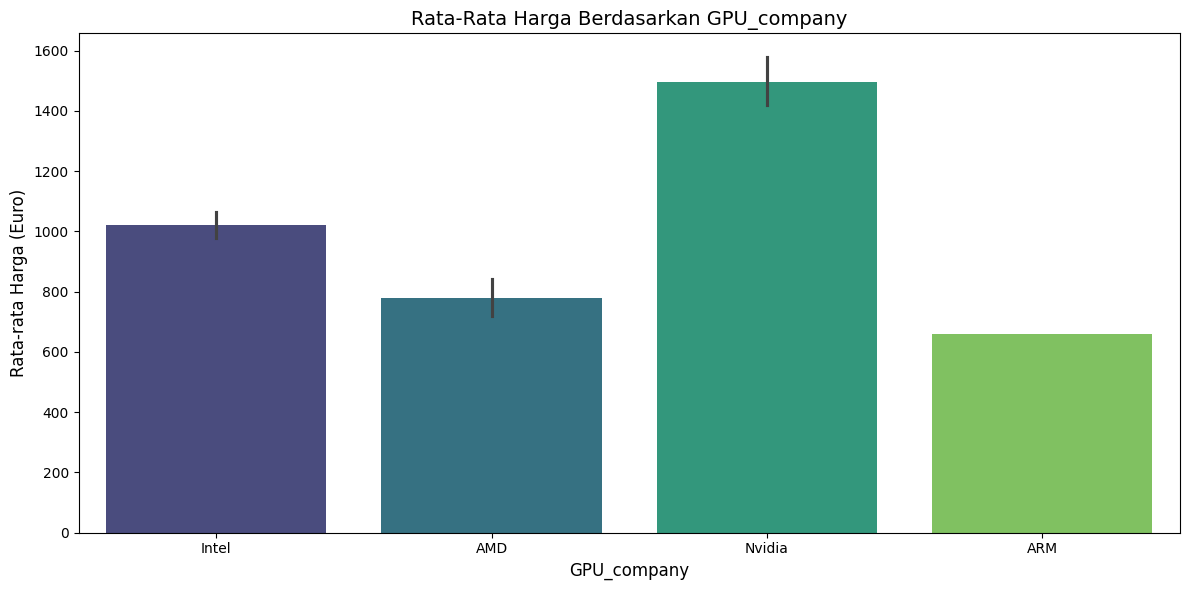

In [18]:
cat_col = ["TypeName", "OS", "Screen", "CPU_company", "PrimaryStorageType", "SecondaryStorageType", "GPU_company"]

for col in cat_col:
    plt.figure(figsize=(12, 6))

    sns.barplot(x=col, y="Price_euros", data=df, estimator=np.mean, palette="viridis")

    plt.title(f"Rata-Rata Harga Berdasarkan {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Rata-rata Harga (Euro)", fontsize=12)

    plt.tight_layout()
    plt.show()


Berdasarkan plot diatas, rata-rata harga laptop menunjukkan bahwa tipe perangkat, sistem operasi, layar, serta spesifikasi hardware utama seperti CPU, storage, dan GPU sangat berpengaruh terhadap harga. Laptop dengan spesifikasi tinggi seperti workstation, gaming, macOS, layar 4K, SSD, dan GPU Nvidia cenderung lebih mahal, sedangkan laptop dengan spesifikasi lebih sederhana seperti netbook, Chrome OS, HDD, dan GPU bawaan lebih terjangkau.









#### Fitur kategori yang hanya memiliki 2 kategori (Yes/No)

<ipython-input-19-85c30c1c3671>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Price_euros", data=df, estimator=np.mean, palette="viridis")


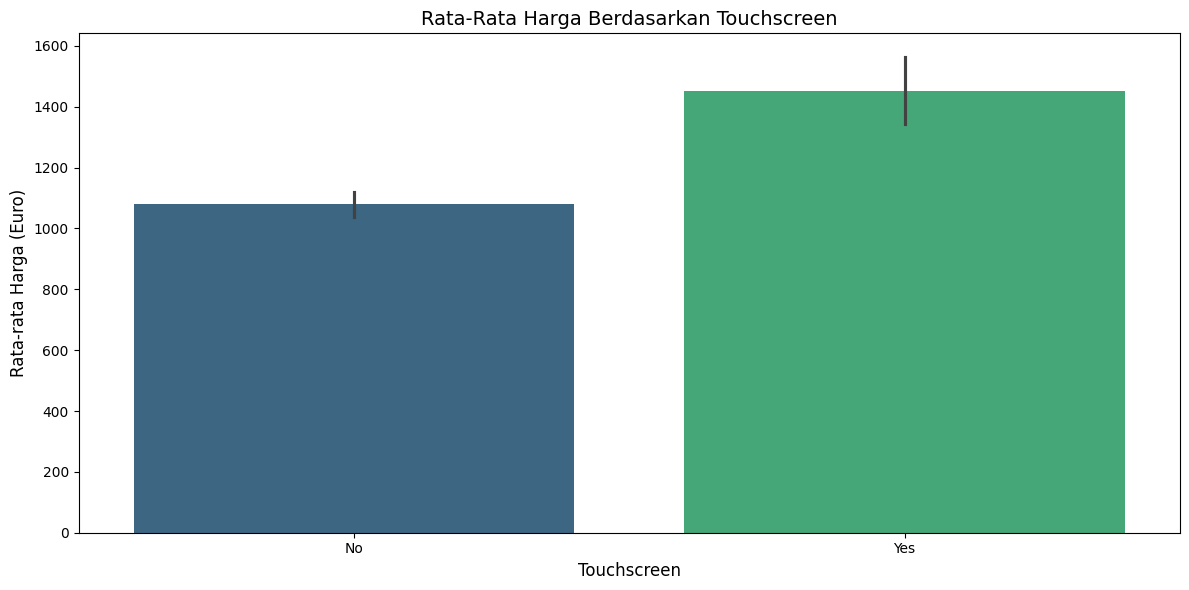

<ipython-input-19-85c30c1c3671>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Price_euros", data=df, estimator=np.mean, palette="viridis")


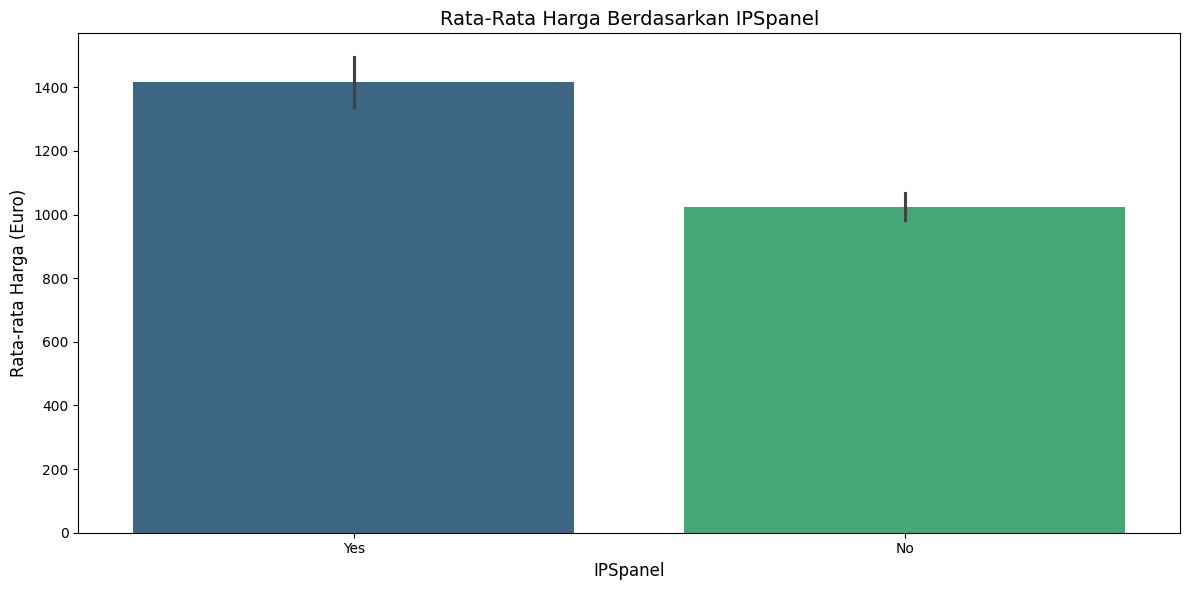

<ipython-input-19-85c30c1c3671>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y="Price_euros", data=df, estimator=np.mean, palette="viridis")


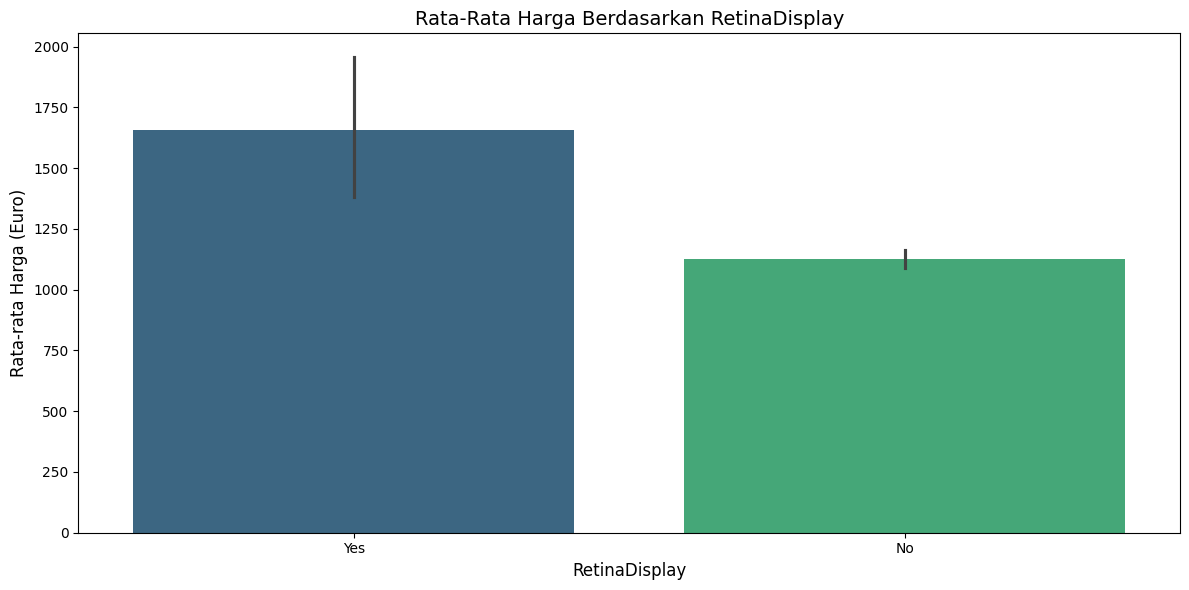

In [19]:
binary_cat_col = ["Touchscreen", "IPSpanel", "RetinaDisplay"]

for col in binary_cat_col:
    plt.figure(figsize=(12, 6))

    sns.barplot(x=col, y="Price_euros", data=df, estimator=np.mean, palette="viridis")

    plt.title(f"Rata-Rata Harga Berdasarkan {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Rata-rata Harga (Euro)", fontsize=12)

    plt.tight_layout()
    plt.show()

Berdasarkan grafik, fitur layar sentuh, panel IPS, dan Retina Display berkontribusi pada kenaikan harga laptop. Laptop dengan kualitas layar lebih tinggi umumnya berada di kelas premium, menunjukkan bahwa teknologi layar yang lebih baik menjadi faktor pembeda utama dalam harga perangkat.











### Fitur-fitur Numerik

Text(0.5, 1.0, 'correlation matrix for numeric features')

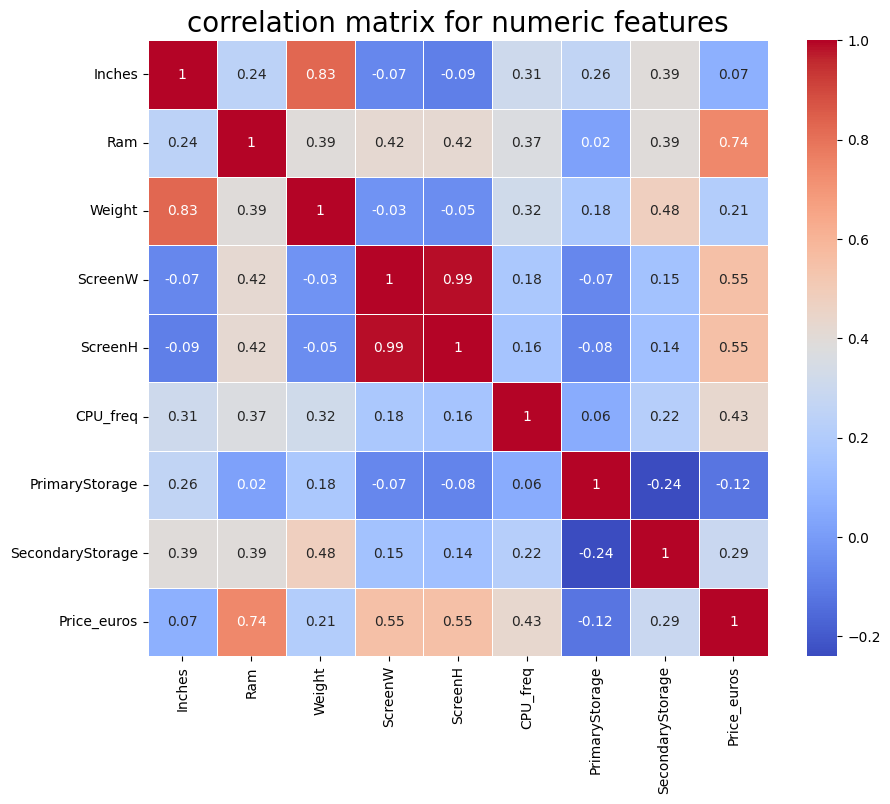

In [20]:
plt.figure(figsize=(10, 8))
num_features = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[num_features].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('correlation matrix for numeric features', size=20)

Gambar heatmap menunjukkan bahwa RAM memiliki korelasi tertinggi dengan harga, sementara fitur lain seperti resolusi layar, CPU, dan penyimpanan tambahan juga berkontribusi terhadap harga yang lebih tinggi.

Sebaliknya, primary storage memiliki korelasi negatif, yang menunjukkan bahwa keberadaan SSD tidak selalu meningkatkan harga secara signifikan. Ukuran layar juga memiliki korelasi rendah, karena ada laptop kecil yang tetap mahal dan laptop besar yang relatif terjangkau.

Karena Inches dan PrimaryStorage punya korelasi rendah dengan harga (Price_euros), kedua fitur ini di-drop supaya analisis lebih fokus ke faktor yang benar-benar berpengaruh.

In [21]:
drop_feat = ['Inches', 'PrimaryStorage']
df.drop(drop_feat, inplace=True, axis=1)
df.head()

,Company,Product,TypeName,Ram,OS,Weight,Screen,ScreenW,ScreenH,Touchscreen,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Price_euros
0,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,Standard,2560,1600,No,...,Yes,Intel,2.3,Core i5,0,SSD,No,Intel,Iris Plus Graphics 640,1339.69
1,Apple,Macbook Air,Ultrabook,8,macOS,1.34,Standard,1440,900,No,...,No,Intel,1.8,Core i5,0,Flash Storage,No,Intel,HD Graphics 6000,898.94
2,HP,250 G6,Notebook,8,No OS,1.86,Full HD,1920,1080,No,...,No,Intel,2.5,Core i5 7200U,0,SSD,No,Intel,HD Graphics 620,575.00
3,Apple,MacBook Pro,Ultrabook,16,macOS,1.83,Standard,2880,1800,No,...,Yes,Intel,2.7,Core i7,0,SSD,No,AMD,Radeon Pro 455,2537.45
4,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,Standard,2560,1600,No,...,Yes,Intel,3.1,Core i5,0,SSD,No,Intel,Iris Plus Graphics 650,1803.60


# Data Preparation


Pada tahap ini, data dipersiapkan dengan beberapa langkah:

- Menghapus fitur yang kurang relevan seperti product karena granular (terlalu bervariasi)

- Mengelompokkan kategori dengan variasi tinggi (CPU_model & GPU_model) untuk menyederhanakan data.

- Melakukan encoding pada fitur kategori agar dapat digunakan dalam model.

- Menerapkan PCA untuk mengurangi dimensi data tanpa kehilangan informasi penting.

- Membagi data menjadi train dan test set untuk evaluasi model.

- Standarisasi fitur numerik agar memiliki skala yang seragam.

## Drop fitur Product (Granular)

Fitur Product dihapus karena memiliki 618 kategori yang terlalu bervariasi, sehingga dapat menyulitkan proses encoding.

In [22]:
df.drop('Product', inplace=True, axis=1)
df.head()

,Company,TypeName,Ram,OS,Weight,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Price_euros
0,Apple,Ultrabook,8,macOS,1.37,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,0,SSD,No,Intel,Iris Plus Graphics 640,1339.69
1,Apple,Ultrabook,8,macOS,1.34,Standard,1440,900,No,No,No,Intel,1.8,Core i5,0,Flash Storage,No,Intel,HD Graphics 6000,898.94
2,HP,Notebook,8,No OS,1.86,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,0,SSD,No,Intel,HD Graphics 620,575.00
3,Apple,Ultrabook,16,macOS,1.83,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,0,SSD,No,AMD,Radeon Pro 455,2537.45
4,Apple,Ultrabook,8,macOS,1.37,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,0,SSD,No,Intel,Iris Plus Graphics 650,1803.60


## Pengelompokan fitur Banyak Kategori (CPU_model & GPU_model)

In [23]:
def categorize_cpu(cpu):
  cpu = cpu.lower()
  if 'i3' in cpu or 'ryzen 3' in cpu:
    return 'Low'
  if 'i5' in cpu or 'ryzen 5' in cpu:
    return 'Mid'
  if 'i7' in cpu or 'i9' in cpu or 'ryzen 7' in cpu or 'ryzen 9' in cpu:
    return 'High'
  return 'Other'

df['CPU_performance'] = df['CPU_model'].apply(categorize_cpu)
df.drop(columns=['CPU_model'], inplace=True)

df = pd.get_dummies(df, columns=['CPU_performance'], drop_first=False, dtype='int')
df.head()

,Company,TypeName,Ram,OS,Weight,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,...,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Price_euros,CPU_performance_High,CPU_performance_Low,CPU_performance_Mid,CPU_performance_Other
0,Apple,Ultrabook,8,macOS,1.37,Standard,2560,1600,No,Yes,...,0,SSD,No,Intel,Iris Plus Graphics 640,1339.69,0,0,1,0
1,Apple,Ultrabook,8,macOS,1.34,Standard,1440,900,No,No,...,0,Flash Storage,No,Intel,HD Graphics 6000,898.94,0,0,1,0
2,HP,Notebook,8,No OS,1.86,Full HD,1920,1080,No,No,...,0,SSD,No,Intel,HD Graphics 620,575.00,0,0,1,0
3,Apple,Ultrabook,16,macOS,1.83,Standard,2880,1800,No,Yes,...,0,SSD,No,AMD,Radeon Pro 455,2537.45,1,0,0,0
4,Apple,Ultrabook,8,macOS,1.37,Standard,2560,1600,No,Yes,...,0,SSD,No,Intel,Iris Plus Graphics 650,1803.60,0,0,1,0


Pada tahap ini, fitur CPU_model yang memiliki banyak kategori dikelompokkan berdasarkan tingkat performanya. CPU_model dikategorikan menjadi Low (i3/Ryzen 3), Mid (i5/Ryzen 5), dan High (i7, i9, Ryzen 7, Ryzen 9) agar lebih mudah dianalisis. Setelah dikategorikan, fitur asli (CPU_model) dihapus, lalu kategori baru dikonversi menjadi variabel dummy.










In [24]:
def categorize_gpu(gpu):
  gpu = gpu.lower()
  if ('intel' in gpu or 'uhd' in gpu or 'hd' in gpu or 'iris' in gpu or 'integrated' in gpu):
      return 'Integrated'
  elif ('gtx' in gpu or 'rtx' in gpu or 'radeon rx' in gpu):
      return 'High'
  elif ('mx' in gpu or 'radeon r' in gpu or 'quadro' in gpu):
      return 'Mid'
  return 'Other'


df['GPU_performance'] = df['GPU_model'].apply(categorize_gpu)
df.drop(columns=['GPU_model'], inplace=True)

df = pd.get_dummies(df, columns=['GPU_performance'], drop_first=False, dtype='int')
df.head()

,Company,TypeName,Ram,OS,Weight,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,...,GPU_company,Price_euros,CPU_performance_High,CPU_performance_Low,CPU_performance_Mid,CPU_performance_Other,GPU_performance_High,GPU_performance_Integrated,GPU_performance_Mid,GPU_performance_Other
0,Apple,Ultrabook,8,macOS,1.37,Standard,2560,1600,No,Yes,...,Intel,1339.69,0,0,1,0,0,1,0,0
1,Apple,Ultrabook,8,macOS,1.34,Standard,1440,900,No,No,...,Intel,898.94,0,0,1,0,0,1,0,0
2,HP,Notebook,8,No OS,1.86,Full HD,1920,1080,No,No,...,Intel,575.00,0,0,1,0,0,1,0,0
3,Apple,Ultrabook,16,macOS,1.83,Standard,2880,1800,No,Yes,...,AMD,2537.45,1,0,0,0,0,0,0,1
4,Apple,Ultrabook,8,macOS,1.37,Standard,2560,1600,No,Yes,...,Intel,1803.60,0,0,1,0,0,1,0,0


Pada tahap ini, fitur GPU_model yang memiliki banyak variasi dikategorikan berdasarkan tingkat performa. GPU diklasifikasikan menjadi Integrated (GPU bawaan Intel/AMD), Mid (MX series, Radeon R, Quadro), dan High (GTX, RTX, Radeon RX) sesuai dengan kemampuannya. Setelah proses pengelompokan, fitur asli (GPU_model) dihapus, dan kategori baru dikonversi menjadi variabel dummy untuk mempermudah analisis.

## Fitur-fitur Kategori Encoding

#### One-Hot Encoding

In [25]:
ohe_feat = ['Company', 'TypeName', 'Screen', 'OS', 'Screen', 'CPU_company', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company']

df = pd.get_dummies(df, columns=ohe_feat, drop_first=True, dtype='int')
df.head()

,Ram,Weight,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,SecondaryStorage,Price_euros,...,CPU_company_Samsung,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,8,1.37,2560,1600,No,Yes,Yes,2.3,0,1339.69,...,0,0,0,1,0,1,0,0,1,0
1,8,1.34,1440,900,No,No,No,1.8,0,898.94,...,0,0,0,0,0,1,0,0,1,0
2,8,1.86,1920,1080,No,No,No,2.5,0,575.00,...,0,0,0,1,0,1,0,0,1,0
3,16,1.83,2880,1800,No,Yes,Yes,2.7,0,2537.45,...,0,0,0,1,0,1,0,0,0,0
4,8,1.37,2560,1600,No,Yes,Yes,3.1,0,1803.60,...,0,0,0,1,0,1,0,0,1,0


Pada tahap ini, fitur kategori seperti Company, TypeName, Screen, OS, CPU_company, PrimaryStorageType, SecondaryStorageType, dan GPU_company dikonversi menjadi format numerik menggunakan One-Hot Encoding (OHE). Dengan metode ini, setiap kategori direpresentasikan sebagai variabel biner (0 atau 1), memungkinkan model untuk memahami informasi kategori secara lebih efektif.

#### Label Encoding

In [26]:
binary_cat_col = ["Touchscreen", "IPSpanel", "RetinaDisplay"]
le = LabelEncoder()

for col in binary_cat_col:
  df[col] = le.fit_transform(df[col])

df.head()

,Ram,Weight,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,SecondaryStorage,Price_euros,...,CPU_company_Samsung,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,8,1.37,2560,1600,0,1,1,2.3,0,1339.69,...,0,0,0,1,0,1,0,0,1,0
1,8,1.34,1440,900,0,0,0,1.8,0,898.94,...,0,0,0,0,0,1,0,0,1,0
2,8,1.86,1920,1080,0,0,0,2.5,0,575.00,...,0,0,0,1,0,1,0,0,1,0
3,16,1.83,2880,1800,0,1,1,2.7,0,2537.45,...,0,0,0,1,0,1,0,0,0,0
4,8,1.37,2560,1600,0,1,1,3.1,0,1803.60,...,0,0,0,1,0,1,0,0,1,0


Pada tahap ini, fitur kategori biner seperti Touchscreen, IPSpanel, dan RetinaDisplay dikonversi menjadi format numerik menggunakan Label Encoding. Setiap nilai dalam fitur tersebut diubah menjadi 0 atau 1, di mana 0 merepresentasikan tidak memiliki fitur tersebut, dan 1 berarti memiliki fitur tersebut. Metode ini digunakan karena fitur hanya memiliki dua kemungkinan nilai, sehingga lebih sederhana dibandingkan One-Hot Encoding.

## PCA

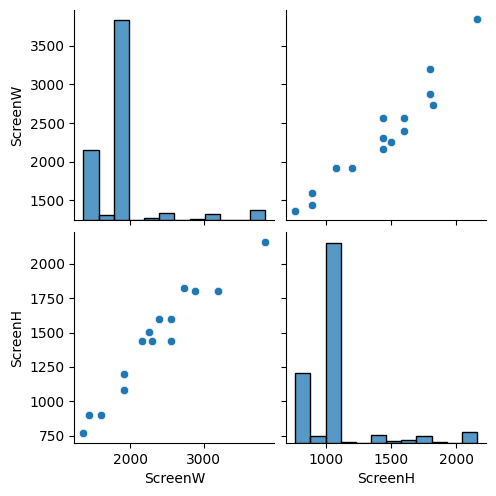

In [27]:
sns.pairplot(df[['ScreenW','ScreenH']])

Berdasarkan grafik di atas, hubungan antara ScreenH dan ScreenW terlihat sangat berdekatan, menunjukkan korelasi yang tinggi antara keduanya. Hal ini mengakibatkan redundansi informasi, di mana kedua fitur tersebut menyimpan informasi yang hampir sama. Sehingga perlu melakukan teknik Principal Component Analysis (PCA).

In [28]:
pca = PCA(n_components=1, random_state=123)
pca.fit(df[['ScreenW','ScreenH']])
df['ScreenSize'] = pca.transform(df.loc[:, ('ScreenW','ScreenH')]).flatten()
df.drop(['ScreenW','ScreenH'], axis=1, inplace=True)

Dalam proses ini, fitur ScreenW dan ScreenH, yang merepresentasikan resolusi layar, dikompresi menggunakan Principal Component Analysis (PCA). Hasilnya adalah satu fitur baru bernama ScreenSize, yang tetap mempertahankan informasi penting dari kedua fitur sebelumnya. Setelah transformasi ini, ScreenW dan ScreenH dihapus untuk menghindari redundansi dan menyederhanakan data.

## Train-Test-Split

In [29]:
X = df.drop(["Price_euros"], axis=1)
y = df["Price_euros"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Setelah melakukan drop fitur, pengelompokan, dan PCA, langkah selanjutnya adalah membagi data (Train-Test Split) sebelum memasuki tahap pemodelan. Pada tahap ini, Price_euros dipisahkan dari dataframe utama dan digunakan sebagai target variabel, sementara fitur lainnya menjadi variabel prediktor.

In [30]:
print(f'Total number of samples in the whole dataset: {len(X)}')
print(f'Total number of samples in the training set: {len(X_train)}')
print(f'Total number of samples in the test set: {len(X_test)}')

Total number of samples in the whole dataset: 1275
Total number of samples in the training set: 1020
Total number of samples in the test set: 255


Train-Test-Split yang diperlukan pada dataset ini sebanyak 80% data digunakan untuk Train (1.020 sampel) dan 20% sisanya untuk Test (255 sampel).

## Standardisasi

Standardisasi bertujuan untuk menyamakan skala setiap fitur agar model dapat bekerja lebih optimal

In [31]:
numerical_features = ['Ram', 'Weight', 'ScreenSize', 'SecondaryStorage']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Ram,Weight,ScreenSize,SecondaryStorage
798,-0.085621,-1.003875,0.029201,-0.432937
351,-0.085621,-0.311545,0.029201,-0.432937
529,-0.085621,-0.221242,0.029201,-0.432937
729,-0.883186,0.079771,0.029201,-0.432937
1062,-0.883186,0.305531,0.029201,-0.432937


Setelah dilakukan standarisasi, setiap nilai di kolom Ram, Weight, ScreenSize, dan SecondaryStorage diubah sehingga memiliki rata-rata 0 dan standar deviasi 1.

Contohnya:
- **Ram** dengan nilai -0.085621 berarti sedikit di bawah rata-rata.
- **Weight** dengan nilai -1.003875 menunjukkan berat laptop tersebut lebih rendah dari rata-rata.
- **ScreenSize** memiliki nilai konstan 0.029201, menunjukkan ukuran layar hampir seragam antar laptop.
- **SecondaryStorage** dengan nilai -0.432937 menunjukkan kapasitas penyimpanan sekunder yang lebih rendah dari rata-rata.

In [32]:
X_train[numerical_features].describe().round(4)

,Ram,Weight,ScreenSize,SecondaryStorage
count,1020.0000,1020.0000,1020.0000,1020.0000
mean,-0.0000,-0.0000,-0.0000,0.0000
std,1.0005,1.0005,1.0005,1.0005
min,-1.2820,-2.0424,-1.0671,-0.4329
25%,-0.8832,-0.8233,-0.6038,-0.4329
50%,-0.0856,-0.0105,0.0292,-0.4329
75%,-0.0856,0.4109,0.0292,-0.4329
max,11.0803,3.9929,3.8274,4.3093


Setelah dilakukan standarisasi, statistik deskriptif untuk fitur numerik menunjukkan bahwa:

- Rata-rata (mean) dari setiap kolom hampir 0, menandakan data sudah terstandarisasi.

- Standar deviasi (std) mendekati 1, yang menunjukkan variasi data yang konsisten.

- Nilai minimum dan maksimum menunjukkan rentang nilai yang bervariasi, seperti pada Ram yang memiliki nilai terendah -1.282 dan tertinggi 11.0803.

- Sebagian besar data terdistribusi di sekitar median (50%), dengan nilai 25% dan 75% menunjukkan rentang nilai di bawah dan di atas rata-rata.

# Pengembangan Model

Model yang dikembangkan dalam proyek ini melibatkan beberapa algoritma pembelajaran mesin untuk meningkatkan prediksi harga, yaitu:

- **Random Forest Regressor (RF)**: Menggunakan banyak pohon keputusan untuk meningkatkan akurasi dan mengurangi overfitting.
- **Extra Trees Regressor (ET)**: Mirip dengan RF, tetapi lebih acak dalam pembagian node, sehingga pelatihan lebih cepat.
- **Gradient Boosting Regressor (GBR)**: Membangun pohon secara bertahap untuk memperbaiki kesalahan pohon sebelumnya, fokus pada prediksi yang sulit.

In [33]:
# Membuat sebuah DataFrame kosong
models = pd.DataFrame(index=['train_mse', 'test_mse'], columns=['RF', 'ET', 'GBR'])

## Random Forest Regressor (RF)

In [34]:
rf = RandomForestRegressor(n_estimators=50, max_depth=15, random_state=55, n_jobs=-1)
rf.fit(X_train, y_train)

models.loc['train_mse','RF'] = mean_squared_error(y_pred=rf.predict(X_train), y_true=y_train)

Kode di atas melatih model Random Forest Regressor (RF) dengan 50 estimators (pohon keputusan) dan kedalaman maksimum pohon 15. Setelah model dilatih, dilakukan perhitungan Mean Squared Error (MSE) pada data pelatihan (X_train dan y_train) dengan membandingkan hasil prediksi (rf.predict(X_train)) dengan nilai sebenarnya (y_train). Nilai MSE ini kemudian disimpan di DataFrame models pada kolom RF dan baris train_mse.

## Extra Trees Regressor (ET)

In [35]:
et = ExtraTreesRegressor(n_estimators=50, max_depth=15, random_state=55, n_jobs=-1)
et.fit(X_train, y_train)

models.loc['train_mse','ET'] = mean_squared_error(y_pred=et.predict(X_train), y_true=y_train)

Kode di atas melatih model Extra Trees Regressor (ET) dengan 50 pohon keputusan dan kedalaman maksimal 15. Setelah model selesai dilatih, dilakukan evaluasi dengan menghitung Mean Squared Error (MSE) pada data pelatihan dengan membandingkan hasil prediksi model dengan nilai aslinya.

## Gradient Boosting Regressor (GBR)

In [36]:
gbr = GradientBoostingRegressor(n_estimators=50, max_depth=15, learning_rate=0.5, random_state=55)
gbr.fit(X_train, y_train)

models.loc['train_mse','GBR'] = mean_squared_error(y_pred=gbr.predict(X_train), y_true=y_train)

Kode di atas melatih model Gradient Boosting Regressor (GBR) dengan 50 pohon keputusan, kedalaman maksimal 15, dan learning rate 0.5. Setelah model selesai dilatih, dilakukan evaluasi dengan menghitung Mean Squared Error (MSE) pada data pelatihan dengan membandingkan hasil prediksi model dengan nilai sebenarnya.

# Evaluasi Model

In [37]:
X_test[numerical_features] = X_test[numerical_features].astype(float)
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Pada tahap awal evaluasi model, kode ini memastikan untuk mengubah tipe data semua fitur numerik di X_test menjadi float. Selain itu, menormalisasi/standarisasi fitur numerik dengan scaler (misalnya StandardScaler), menggantikan nilai aslinya dengan nilai yang telah di-transformasi.



## Metrik Evaluasi Regresi

In [38]:
metrics = ['MSE', 'RMSE', 'MAE', 'R2']
results = pd.DataFrame(columns=['train_' + m for m in metrics] + ['test_' + m for m in metrics], index=['RF', 'ET', 'GBR'])

model_dict = {'RF': rf, 'ET': et, 'GBR': gbr}

for name, model in model_dict.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results.loc[name, 'train_MSE'] = mean_squared_error(y_true=y_train, y_pred=y_train_pred) / 1e3
    results.loc[name, 'test_MSE'] = mean_squared_error(y_true=y_test, y_pred=y_test_pred) / 1e3

    results.loc[name, 'train_RMSE'] = np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_train_pred)) / np.sqrt(1e3)
    results.loc[name, 'test_RMSE'] = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred)) / np.sqrt(1e3)

    results.loc[name, 'train_MAE'] = mean_absolute_error(y_true=y_train, y_pred=y_train_pred)
    results.loc[name, 'test_MAE'] = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)

    results.loc[name, 'train_R2'] = r2_score(y_true=y_train, y_pred=y_train_pred)
    results.loc[name, 'test_R2'] = r2_score(y_true=y_test, y_pred=y_test_pred)

results


,train_MSE,train_RMSE,train_MAE,train_R2,test_MSE,test_RMSE,test_MAE,test_R2
RF,17.775668,4.21612,84.104981,0.962509,72.041423,8.487722,181.972789,0.870562
ET,6.416878,2.533156,40.067179,0.986466,78.776173,8.875594,197.354094,0.858462
GBR,2.102583,1.450029,12.14418,0.995565,94.388469,9.715373,213.837329,0.830411


Kode ini digunakan untuk mengevaluasi tiga model regresi: Random Forest (RF), Extra Trees (ET), dan Gradient Boosting Regressor (GBR). Evaluasi dilakukan dengan empat metrik:  

1. **MSE (Mean Squared Error)** – Mengukur rata-rata selisih kuadrat antara nilai asli dan prediksi (lebih kecil lebih baik).  
2. **RMSE (Root Mean Squared Error)** – Akar kuadrat dari MSE, sehingga hasilnya lebih mudah dipahami karena satuannya sama dengan data asli.  
3. **MAE (Mean Absolute Error)** – Rata-rata dari selisih absolut antara nilai asli dan prediksi.  
4. **R² (R-squared)** – Menunjukkan seberapa baik model menjelaskan variasi data, semakin mendekati 1, semakin baik.  

Dari hasil evaluasi, model GBR terlihat paling baik saat diuji pada data training (R² = 0.995). Namun, saat diuji pada data test, performanya menurun cukup jauh (R² = 0.83), yang menunjukkan model ini mengalami **overfitting**. Sementara itu, RF dan ET memiliki keseimbangan yang lebih baik antara training dan test, sehingga lebih stabil.

Kode ini membuat grafik batang horizontal untuk membandingkan performa model berdasarkan empat metrik evaluasi:

- MSE, RMSE, dan MAE → Semakin kecil nilainya, semakin baik.

- R² Score → Semakin besar nilainya, semakin baik.

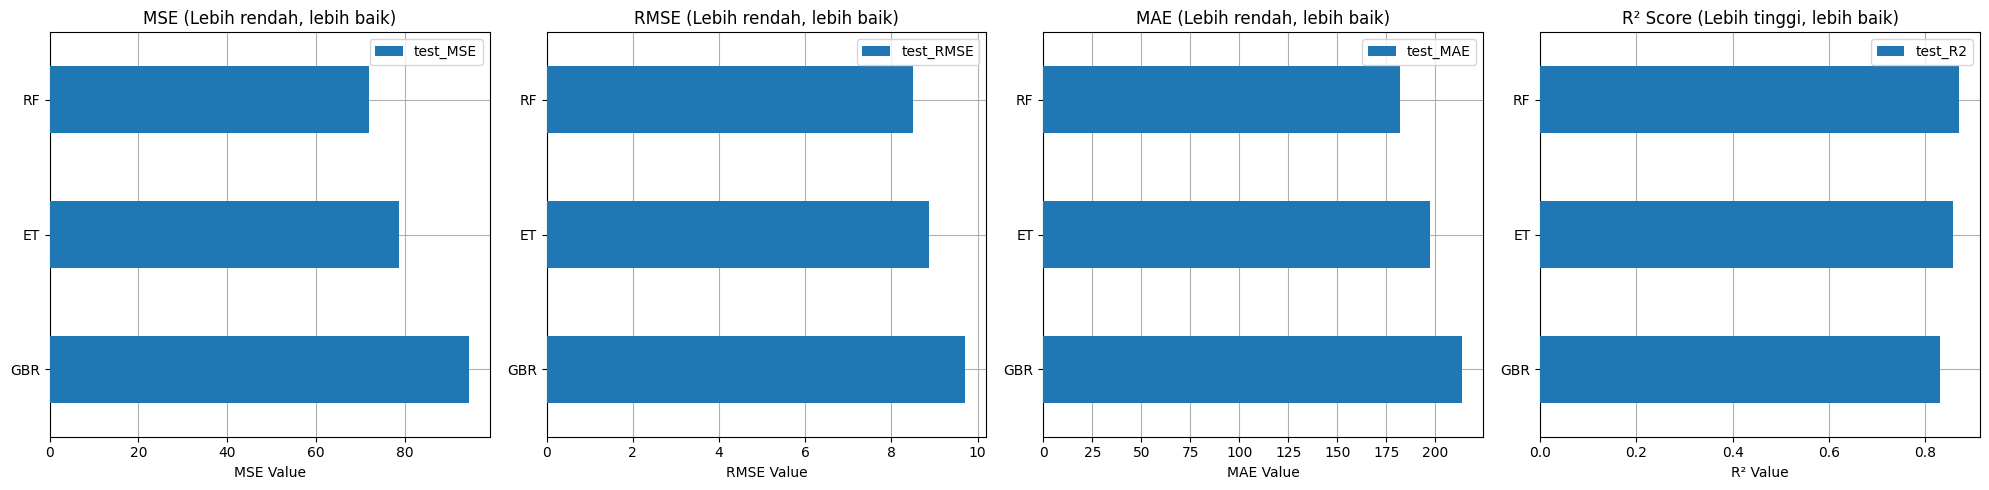

In [39]:
# Plot hasil perbandingan
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# MSE (Semakin rendah semakin baik)
results[['test_MSE']].sort_values(by='test_MSE', ascending=False).plot(kind='barh', ax=axes[0], zorder=3)
axes[0].set_title("MSE (Lebih rendah, lebih baik)")
axes[0].set_xlabel("MSE Value")
axes[0].grid(zorder=0)

# RMSE (Semakin rendah semakin baik)
results[['test_RMSE']].sort_values(by='test_RMSE', ascending=False).plot(kind='barh', ax=axes[1], zorder=3)
axes[1].set_title("RMSE (Lebih rendah, lebih baik)")
axes[1].set_xlabel("RMSE Value")
axes[1].grid(zorder=0)

# MAE (Semakin rendah semakin baik)
results[['test_MAE']].sort_values(by='test_MAE', ascending=False).plot(kind='barh', ax=axes[2], zorder=3)
axes[2].set_title("MAE (Lebih rendah, lebih baik)")
axes[2].set_xlabel("MAE Value")
axes[2].grid(zorder=0)

# R² Score (Semakin tinggi semakin baik)
results[['test_R2']].sort_values(by='test_R2', ascending=True).plot(kind='barh', ax=axes[3], zorder=3)
axes[3].set_title("R² Score (Lebih tinggi, lebih baik)")
axes[3].set_xlabel("R² Value")
axes[3].grid(zorder=0)

plt.tight_layout()
plt.show()

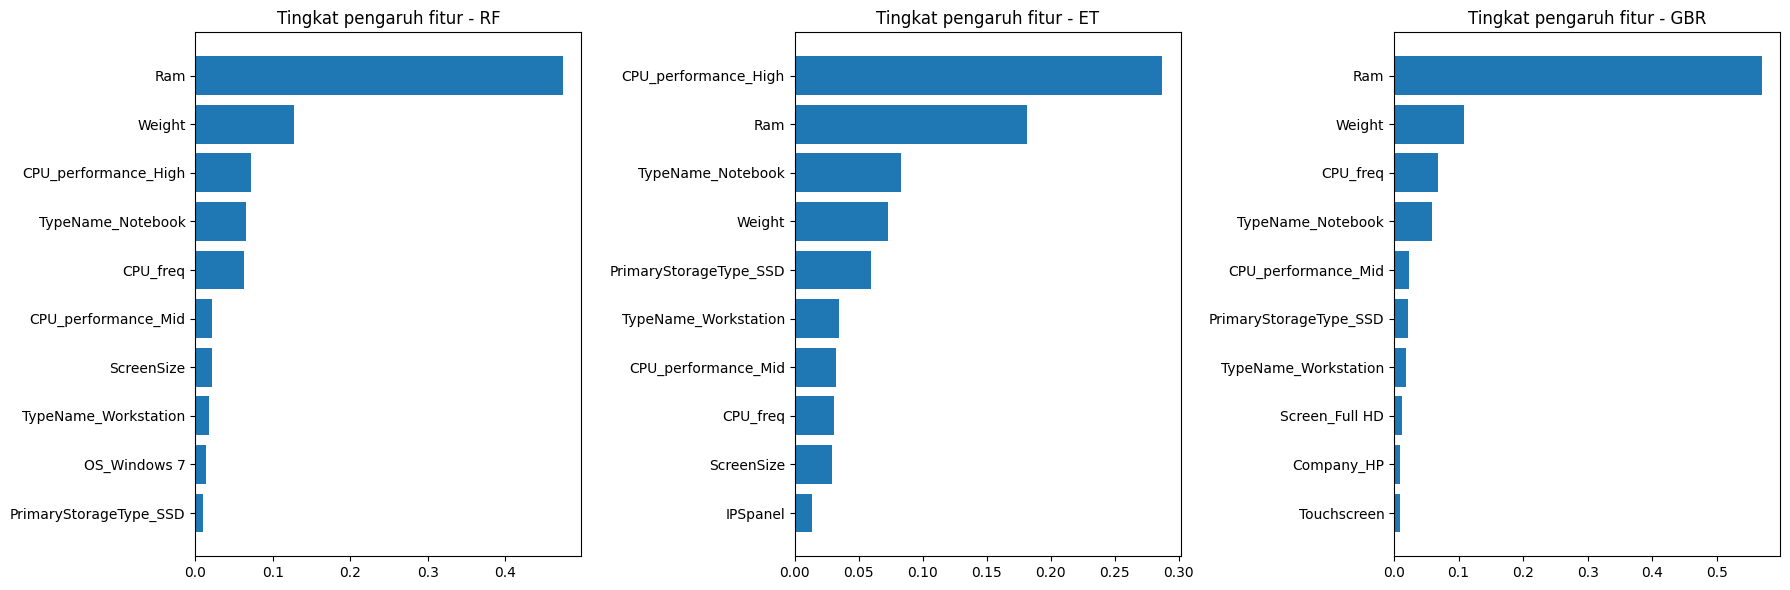

In [40]:
# Mengambil nama fitur
feature_names = np.array(X_train.columns)

# Menampilkan feature importance (tingkat pengaruh fitur) untuk setiap model
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (name, model) in enumerate(model_dict.items()):
    importance = model.feature_importances_
    sorted_idx = np.argsort(importance)[::-1]

    axes[i].barh(feature_names[sorted_idx][:10][::-1], importance[sorted_idx][:10][::-1])
    axes[i].set_title(f'Tingkat pengaruh fitur - {name}')

plt.tight_layout()
plt.show()

Kode ini dapat menjawab dari statement permasalahan dalam proyek ini yaitu **"Fitur atau komponen apa saja yang paling berpengaruh terhadap harga laptop?"**

Dari hasil Feature Importance pada tiga model yang digunakan (Random Forest, Extra Trees, dan Gradient Boosting Regressor), fitur yang paling berpengaruh terhadap harga laptop adalah:

- RAM: Muncul sebagai fitur paling penting di semua model, menunjukkan bahwa semakin besar RAM, semakin tinggi harga laptop.

- Weight: Laptop yang lebih ringan cenderung lebih mahal, kemungkinan karena material premium atau desain yang lebih ringkas.

- CPU Performance (High dan Mid): Kinerja prosesor sangat memengaruhi harga, dengan kategori high-performance memiliki pengaruh terbesar.

- CPU Frequency: Kecepatan prosesor juga berperan, meskipun lebih rendah dibandingkan kategori performa CPU.

- Jenis Laptop (Notebook, Workstation): Model notebook dan workstation memiliki pengaruh signifikan, menandakan bahwa tipe laptop yang ditargetkan untuk profesional atau pekerjaan berat lebih mahal.

- Penyimpanan SSD: Laptop dengan SSD memiliki harga yang lebih tinggi dibandingkan HDD.

In [41]:
predict = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name in models.columns:
  model = model_dict[name]
  pred_dict['Prediksi_'+name] = model.predict(predict).round(1)

pd.DataFrame(pred_dict)

,y_true,Prediksi_RF,Prediksi_ET,Prediksi_GBR
561,630.0,630.6,604.6,529.9


Dari evaluasi yang dilakukan, RF memberikan prediksi yang paling mendekati harga sebenarnya, diikuti oleh ET, sementara GBR memiliki selisih yang lebih besar.

Sebagai contoh, pada satu sampel data:

- Harga asli: 630.0

- **Prediksi RF: 630.6**

- Prediksi ET: 604.6

- Prediksi GBR: 529.9

Dengan model yang lebih akurat, perusahaan dapat memperkirakan harga laptop berdasarkan spesifikasi dengan lebih presisi.








